In [1]:
import pandas as pd
from pathlib import Path
import arrow
from collections import Counter


In [279]:
# import sys
# !{sys.executable} -m pip install arrow

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 66 kB 3.0 MB/s eta 0:00:011
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [2]:
DATA_FOLDER = Path.home() / "uni" / "data" 
mimic_path = DATA_FOLDER / "mimic-iii-clinical-database-1.4"

In [3]:
documents = [fp for fp in (mimic_path).rglob("*.csv") if fp.is_file() and fp.stem[0] != '.']
len(documents)

26

In [4]:
for ind, doc in enumerate(documents):
    print(ind, str(doc).rsplit("/")[-1])

0 PROCEDUREEVENTS_MV.csv
1 CALLOUT.csv
2 D_CPT.csv
3 D_ITEMS.csv
4 CAREGIVERS.csv
5 MICROBIOLOGYEVENTS.csv
6 LABEVENTS.csv
7 INPUTEVENTS_CV.csv
8 ADMISSIONS.csv
9 D_LABITEMS.csv
10 DATETIMEEVENTS.csv
11 PRESCRIPTIONS.csv
12 PROCEDURES_ICD.csv
13 NOTEEVENTS.csv
14 CHARTEVENTS.csv
15 TRANSFERS.csv
16 DIAGNOSES_ICD.csv
17 SERVICES.csv
18 DRGCODES.csv
19 OUTPUTEVENTS.csv
20 PATIENTS.csv
21 D_ICD_DIAGNOSES.csv
22 ICUSTAYS.csv
23 INPUTEVENTS_MV.csv
24 D_ICD_PROCEDURES.csv
25 CPTEVENTS.csv


In [1998]:
test_path = documents[21]
icd9 = pd.read_csv(test_path)
print(test_path)
icd9

/Users/I544782/uni/data/mimic-iii-clinical-database-1.4/D_ICD_DIAGNOSES.csv


ROW_ID ICD9_CODE               SHORT_TITLE  \
0         174     01166     TB pneumonia-oth test   
1         175     01170    TB pneumothorax-unspec   
2         176     01171   TB pneumothorax-no exam   
3         177     01172  TB pneumothorx-exam unkn   
4         178     01173  TB pneumothorax-micro dx   
...       ...       ...                       ...   
14562   14432     V7399     Scrn unspcf viral dis   
14563   14433      V740     Screening for cholera   
14564   14434      V741    Screening-pulmonary TB   
14565   14435      V742     Screening for leprosy   
14566   14436      V743  Screening for diphtheria   

                                              LONG_TITLE  
0      Tuberculous pneumonia [any form], tubercle bac...  
1                  Tuberculous pneumothorax, unspecified  
2      Tuberculous pneumothorax, bacteriological or h...  
3      Tuberculous pneumothorax, bacteriological or h...  
4      Tuberculous pneumothorax, tubercle bacilli fou...  
...                                                  ...  
14562  Special screening examination for unspecified ...  
14563                  Screening examination for cholera  
14564   Screening examination for pulmonary tuberculosis  
14565  Screening examination for leprosy (Hansen's di...  
14566               Screening examination for diphtheria  

[14567 rows x 4 columns]

In [2004]:
codes = []
for ind, x in enumerate(icd9["ICD9_CODE"]):
    codes.append((x, icd9["ROW_ID"][ind]) )

In [2005]:
codes

[('01166', 174),
 ('01170', 175),
 ('01171', 176),
 ('01172', 177),
 ('01173', 178),
 ('01174', 179),
 ('01175', 180),
 ('01176', 181),
 ('01180', 182),
 ('01181', 183),
 ('01182', 184),
 ('01183', 185),
 ('01184', 186),
 ('01185', 187),
 ('01186', 188),
 ('01190', 189),
 ('01191', 190),
 ('01192', 191),
 ('01193', 192),
 ('01194', 193),
 ('01195', 194),
 ('01196', 195),
 ('01200', 196),
 ('01201', 197),
 ('01202', 198),
 ('01203', 199),
 ('01204', 200),
 ('01205', 201),
 ('01206', 202),
 ('01210', 203),
 ('01211', 204),
 ('01212', 205),
 ('01213', 206),
 ('01214', 207),
 ('01215', 208),
 ('01216', 209),
 ('01220', 210),
 ('01221', 211),
 ('01222', 212),
 ('01223', 213),
 ('01224', 214),
 ('01225', 215),
 ('01226', 216),
 ('01230', 217),
 ('01231', 218),
 ('01232', 219),
 ('01233', 220),
 ('01234', 221),
 ('01235', 222),
 ('01792', 604),
 ('01236', 223),
 ('01280', 224),
 ('01281', 225),
 ('01282', 226),
 ('01283', 227),
 ('01284', 228),
 ('01285', 229),
 ('01286', 230),
 ('01300', 231

In [461]:
notes_patient = test.query('SUBJECT_ID == 27051').sort_values(by=['CHARTDATE'])

In [56]:
sep = [(x,test["SUBJECT_ID"][ind]) for ind, x in enumerate(test["TEXT"])]

In [2024]:
subject_id = []
for x in sep:
    if "sepsis" in x[0]:
        subject_id.append(str(x[1]))

In [2025]:
len(set(subject_id))

14516

In [2026]:
ids = {"subject_ids": list(set(subject_id))}


In [2027]:
ids

{'subject_ids': ['219',
  '49031',
  '27070',
  '95735',
  '14013',
  '28497',
  '3798',
  '29496',
  '13337',
  '81041',
  '22174',
  '6944',
  '67358',
  '15868',
  '14142',
  '13301',
  '31860',
  '96094',
  '13622',
  '1544',
  '7996',
  '7125',
  '68389',
  '11910',
  '13878',
  '21694',
  '19295',
  '25401',
  '14046',
  '66508',
  '18653',
  '14501',
  '30660',
  '8718',
  '69262',
  '26932',
  '21274',
  '5358',
  '21225',
  '55867',
  '6961',
  '48418',
  '82769',
  '25672',
  '1310',
  '4290',
  '21660',
  '24303',
  '12891',
  '9367',
  '5522',
  '1057',
  '20951',
  '17857',
  '76637',
  '12754',
  '1775',
  '47785',
  '58005',
  '29290',
  '4119',
  '20518',
  '6261',
  '3665',
  '2088',
  '57114',
  '6886',
  '14979',
  '9409',
  '18488',
  '62522',
  '16381',
  '21439',
  '11963',
  '32268',
  '26749',
  '1132',
  '82433',
  '32376',
  '42196',
  '13495',
  '24699',
  '4890',
  '8839',
  '24374',
  '4310',
  '25213',
  '11274',
  '52732',
  '7869',
  '44486',
  '21087',


In [2028]:
with open("subject_ids.json", "w") as f:
    json.dump(ids, f)

In [1610]:
for x in sep:
    if x[1] == 6962:
        print(x[0])

Admission Date:  [**2178-11-12**]       Discharge Date:  [**2178-12-3**]

Date of Birth:   [**2112-4-25**]       Sex:  F

Service:  MEDICINE

HISTORY OF PRESENT ILLNESS:   The patient is a 66-year-old
female who was initially admitted on [**2178-11-12**],
complaining of increased weakness and groin pain since nine
days prior to admission when she had a fall.  Since the fall,
the patient had been basically confined to her bedroom, did
not drink or eat, and lived on some water, coffee, cigarettes
and occasional beer.  According to her family, the patient
had been not very mobile for some time prior to admission,
mostly because of severe exertional dyspnea.  However,
despite her dyspnea, she continued to smoke two packs of
cigarettes per day.

On admission, the patient denied any fevers, chills, nausea,
vomiting, dizziness, chest pain.

PAST MEDICAL HISTORY:   Significant for chronic obstructive
pulmonary disease, hypertension, history of vitamin B12
deficiency.

ALLERGIES:   No known dru

[** **]/SICU NURSING PROGRESS NOTE
NEURO:  SEDATED ON PROPOFOL, WHEN LIGHTENED, OPENS EYES, F/C'S CONSISTENTLY.  WHEN PROPOFOL LIGHTENED, MICU RESIDENT SPOKE WITH PT, ASKED IF SHE WOULD CONSENT TO TRACH IF TEAM FELT IT WAS NECESSARY, PT NODDED HEAD "YES" IN AGREEMENT, NODDING HEAD YES/NO APPROPRIATELY TO QUESTIONS.

CV:  HR 110'S-120'S, SINUS TACH, NO ECTOPY.  BP STABLE

RESP:  UNABLE TO WEAN PSV, CONTINUES WITH COPIOUS, TENACIOUS CLEAR SECRETIONS.  REQUIRES SUCTIONING APPROX Q1-2HOURS.  BREATH SOUNDS COARSE TO DIMINISHED THROUGHOUT.  SATS 91-93%.

RENAL:  ADEQUATE U/O, SEE I/O

GI:  ABD SOFT, (+)BOWEL SOUNDS, (+)FLATUS, DULCOLAX GIVEN, NO RESULTS YET.  TOLERATING TUBE FEEDS AT GOAL

HEME:  NO ISSUES

ID:  CONTINUES WITH LOW GRADE FEVERS, 99.3-100.3, WBC 19 TODAY.  REMAINS ON FLAGYL AND LEVAQUIN

SKIN:  NO NEW ISSUES

SOCIAL:  [**Name (NI) **] SON IN TO VISIT, UPDATED ON PT'S CONDITION

A:  ALT RESP STATUS

P:  CONTINUE AGGRESSIVE PULM HYGEINE, MONITOR ALL PARAMETERS, PROVIDE SUPPORT T

In [417]:
sepsis = [(x,test["ICD9_CODE"][ind]) for ind, x in enumerate(test["LONG_TITLE"])]


In [421]:
for x in sepsis:
    if "sepsis" in x[0]:
        print(x[0], x[1])

Septicemia [sepsis] of newborn 77181
Severe sepsis 99592
Puerperal sepsis, unspecified as to episode of care or not applicable 67020
Puerperal sepsis, delivered, with mention of postpartum complication 67022
Puerperal sepsis, postpartum condition or complication 67024


In [1608]:
# set(codes)

In [716]:
test.query('HADM_ID == 710')

Empty DataFrame
Columns: [ROW_ID, SUBJECT_ID, HADM_ID, CHARTDATE, CHARTTIME, STORETIME, CATEGORY, DESCRIPTION, CGID, ISERROR, TEXT]
Index: []

In [ ]:
995.91 sepsis patients

In [237]:
title = []
for x in test["SHORT_TITLE"]:
    title.append(x)

In [1607]:
# set(title)

In [93]:
# df2=test.loc[test['SUBJECT_ID'] == 31097, 'TEXT']
df2=test.query('SUBJECT_ID == 31097')
# df2

In [106]:
test_path2 = documents[8]
test2 = pd.read_csv(test_path2)
print(test_path2)

/Users/I544782/uni/data/mimic-iii-clinical-database-1.4/ADMISSIONS.csv


In [218]:
test.query('SUBJECT_ID == 4').sort_values(by=['CHARTDATE'])[:3]

ROW_ID  SUBJECT_ID   HADM_ID   CHARTDATE            CHARTTIME  \
817727  818466           4  185777.0  2191-03-15  2191-03-15 16:20:00   
135156  128008           4  185777.0  2191-03-15                  NaN   
817417  818477           4  185777.0  2191-03-15  2191-03-15 19:55:00   

       STORETIME   CATEGORY                             DESCRIPTION  CGID  \
817727       NaN  Radiology                     CHEST (PORTABLE AP)   NaN   
135156       NaN        ECG                                  Report   NaN   
817417       NaN  Radiology  LIVER OR GALLBLADDER US (SINGLE ORGAN)   NaN   

        ISERROR                                               TEXT  
817727      NaN  [**2191-3-15**] 4:20 PM\n CHEST (PORTABLE AP) ...  
135156      NaN  Sinus tachycardia. Borderline low limb lead vo...  
817417      NaN  [**2191-3-15**] 7:55 PM\n LIVER OR GALLBLADDER...

In [113]:
test2.query('SUBJECT_ID == 4')

ROW_ID  SUBJECT_ID  HADM_ID            ADMITTIME            DISCHTIME  \
213       3           4   185777  2191-03-16 00:28:00  2191-03-23 18:41:00   

    DEATHTIME ADMISSION_TYPE    ADMISSION_LOCATION         DISCHARGE_LOCATION  \
213       NaN      EMERGENCY  EMERGENCY ROOM ADMIT  HOME WITH HOME IV PROVIDR   

    INSURANCE LANGUAGE           RELIGION MARITAL_STATUS ETHNICITY  \
213   Private      NaN  PROTESTANT QUAKER         SINGLE     WHITE   

               EDREGTIME            EDOUTTIME  \
213  2191-03-15 13:10:00  2191-03-16 01:10:00   

                               DIAGNOSIS  HOSPITAL_EXPIRE_FLAG  \
213  FEVER,DEHYDRATION,FAILURE TO THRIVE                     0   

     HAS_CHARTEVENTS_DATA  
213                     1

## Sample patients subset:
27051 <br>
710 <br>
17483 (final diagnosis sepsis) <br>
82559 <br>
62762

In [35]:
sample_patient_lab_events_path = documents[6]
sample_patient_lab_events  = pd.read_csv(sample_patient_lab_events_path)
print(sample_patient_lab_events_path)
sample_patient_lab_events 

/Users/I544782/uni/data/mimic-iii-clinical-database-1.4/LABEVENTS.csv


ROW_ID  SUBJECT_ID   HADM_ID  ITEMID            CHARTTIME VALUE  \
0              281           3       NaN   50820  2101-10-12 16:07:00  7.39   
1              282           3       NaN   50800  2101-10-12 18:17:00   ART   
2              283           3       NaN   50802  2101-10-12 18:17:00    -1   
3              284           3       NaN   50804  2101-10-12 18:17:00    22   
4              285           3       NaN   50808  2101-10-12 18:17:00  0.93   
...            ...         ...       ...     ...                  ...   ...   
27854050  27428435       96443  103219.0   50882  2109-12-30 01:40:00    26   
27854051  27428436       96443  103219.0   50885  2109-12-30 01:40:00   2.1   
27854052  27428437       96443  103219.0   50902  2109-12-30 01:40:00    97   
27854053  27428438       96443  103219.0   50911  2109-12-30 01:40:00     2   
27854054  27428439       96443  103219.0   50912  2109-12-30 01:40:00   1.6   

          VALUENUM VALUEUOM      FLAG  
0             7.39    units       NaN  
1              NaN      NaN       NaN  
2            -1.00    mEq/L       NaN  
3            22.00    mEq/L       NaN  
4             0.93   mmol/L  abnormal  
...            ...      ...       ...  
27854050     26.00    mEq/L       NaN  
27854051      2.10    mg/dL  abnormal  
27854052     97.00    mEq/L       NaN  
27854053      2.00    ng/mL       NaN  
27854054      1.60    mg/dL  abnormal  

[27854055 rows x 9 columns]

In [1615]:
our_patient = sample_patient_lab_events.query('SUBJECT_ID == 62762')

In [1616]:
our_patient

ROW_ID  SUBJECT_ID   HADM_ID  ITEMID            CHARTTIME VALUE  \
23054490  23022937       62762       NaN   50868  2118-11-07 17:55:00    11   
23054491  23022938       62762       NaN   50882  2118-11-07 17:55:00    27   
23054492  23022939       62762       NaN   50887  2118-11-07 17:55:00  HOLD   
23054493  23022940       62762       NaN   50902  2118-11-07 17:55:00    96   
23054494  23022941       62762       NaN   50910  2118-11-07 17:55:00   126   
...            ...         ...       ...     ...                  ...   ...   
23065081  23023277       62762  138258.0   51274  2118-12-03 03:06:00  16.1   
23065082  23023278       62762  138258.0   51275  2118-12-03 03:06:00  35.1   
23065083  23023279       62762  138258.0   51277  2118-12-03 03:06:00  13.9   
23065084  23023280       62762  138258.0   51279  2118-12-03 03:06:00  3.36   
23065085  23023281       62762  138258.0   51301  2118-12-03 03:06:00  17.9   

          VALUENUM VALUEUOM      FLAG  
23054490     11.00    mEq/L       NaN  
23054491     27.00    mEq/L       NaN  
23054492       NaN      NaN       NaN  
23054493     96.00    mEq/L       NaN  
23054494    126.00     IU/L       NaN  
...            ...      ...       ...  
23065081     16.10      sec  abnormal  
23065082     35.10      sec  abnormal  
23065083     13.90        %       NaN  
23065084      3.36     m/uL  abnormal  
23065085     17.90     K/uL  abnormal  

[344 rows x 9 columns]

In [1617]:
a = [x for x in our_patient["HADM_ID"]]
set(a)

{nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 138258.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan}

In [1623]:
ham_id_our_patient = our_patient.query('HADM_ID==138258.0').sort_values(by=['CHARTTIME'])

In [1621]:
ham_id_our_patient = our_patient.sort_values(by=['CHARTTIME'])

In [1624]:
ham_id_our_patient

ROW_ID  SUBJECT_ID   HADM_ID  ITEMID            CHARTTIME   VALUE  \
23057143  23023046       62762  138258.0   50868  2118-12-01 11:00:00      17   
23057171  23023074       62762  138258.0   51266  2118-12-01 11:00:00  NORMAL   
23057172  23023075       62762  138258.0   51267  2118-12-01 11:00:00  NORMAL   
23057173  23023076       62762  138258.0   51268  2118-12-01 11:00:00  NORMAL   
23057174  23023077       62762  138258.0   51277  2118-12-01 11:00:00    12.9   
...            ...         ...       ...     ...                  ...     ...   
23062846  23023255       62762  138258.0   50893  2118-12-03 03:06:00     7.9   
23062845  23023254       62762  138258.0   50882  2118-12-03 03:06:00      19   
23065084  23023280       62762  138258.0   51279  2118-12-03 03:06:00    3.36   
23062857  23023266       62762  138258.0   51200  2118-12-03 03:06:00     0.2   
23065085  23023281       62762  138258.0   51301  2118-12-03 03:06:00    17.9   

          VALUENUM VALUEUOM      FLAG  
23057143     17.00    mEq/L       NaN  
23057171       NaN      NaN       NaN  
23057172       NaN      NaN       NaN  
23057173       NaN      NaN       NaN  
23057174     12.90        %       NaN  
...            ...      ...       ...  
23062846      7.90    mg/dL  abnormal  
23062845     19.00    mEq/L  abnormal  
23065084      3.36     m/uL  abnormal  
23062857      0.20        %       NaN  
23065085     17.90     K/uL  abnormal  

[235 rows x 9 columns]

In [1625]:
df2 = ham_id_our_patient.loc[:, ["ITEMID","CHARTTIME","VALUE","VALUEUOM"]]


In [1626]:
df2
#{charttime: {itemid: "", value:"", valueuom: ""}}                

ITEMID            CHARTTIME   VALUE VALUEUOM
23057143   50868  2118-12-01 11:00:00      17    mEq/L
23057171   51266  2118-12-01 11:00:00  NORMAL      NaN
23057172   51267  2118-12-01 11:00:00  NORMAL      NaN
23057173   51268  2118-12-01 11:00:00  NORMAL      NaN
23057174   51277  2118-12-01 11:00:00    12.9        %
...          ...                  ...     ...      ...
23062846   50893  2118-12-03 03:06:00     7.9    mg/dL
23062845   50882  2118-12-03 03:06:00      19    mEq/L
23065084   51279  2118-12-03 03:06:00    3.36     m/uL
23062857   51200  2118-12-03 03:06:00     0.2        %
23065085   51301  2118-12-03 03:06:00    17.9     K/uL

[235 rows x 4 columns]

In [1627]:
dict1 = df2.to_dict()

In [717]:
sample_patient_lab_items_path = documents[9]
sample_patient_lab_items = pd.read_csv(sample_patient_lab_items_path)
print(sample_patient_lab_items_path)
sample_patient_lab_items 

/Users/I544782/uni/data/mimic-iii-clinical-database-1.4/D_LABITEMS.csv


ROW_ID  ITEMID                       LABEL                      FLUID  \
0       546   51346                      Blasts  Cerebrospinal Fluid (CSF)   
1       547   51347                 Eosinophils  Cerebrospinal Fluid (CSF)   
2       548   51348             Hematocrit, CSF  Cerebrospinal Fluid (CSF)   
3       549   51349  Hypersegmented Neutrophils  Cerebrospinal Fluid (CSF)   
4       550   51350           Immunophenotyping  Cerebrospinal Fluid (CSF)   
..      ...     ...                         ...                        ...   
748     749   51551             VOIDED SPECIMEN           OTHER BODY FLUID   
749     750   51552             VOIDED SPECIMEN                      STOOL   
750     751   51553             VOIDED SPECIMEN                      URINE   
751     752   51554             VOIDED SPECIMEN                JOINT FLUID   
752     753   51555    SURFACTANT ALBUMIN RATIO           OTHER BODY FLUID   

       CATEGORY LOINC_CODE  
0    Hematology    26447-3  
1    Hematology    26451-5  
2    Hematology    30398-2  
3    Hematology    26506-6  
4    Hematology        NaN  
..          ...        ...  
748  HEMATOLOGY        NaN  
749   CHEMISTRY        NaN  
750   CHEMISTRY        NaN  
751  HEMATOLOGY        NaN  
752   CHEMISTRY        NaN  

[753 rows x 6 columns]

In [1628]:
lab_names = [(x,sample_patient_lab_items["LABEL"][ind],sample_patient_lab_items["FLUID"][ind],) for ind, x in enumerate(sample_patient_lab_items["ITEMID"])]
dict1["LAB_NAMES"]={}
for el in dict1["ITEMID"].values():
    for name in lab_names:
        if el == name[0]:
            dict1["LAB_NAMES"][el] = [name[1],name[2]]

dict1["LAB_NAMES"]

{50868: ['Anion Gap', 'Blood'],
 51266: ['Platelet Smear', 'Blood'],
 51267: ['Poikilocytosis', 'Blood'],
 51268: ['Polychromasia', 'Blood'],
 51277: ['RDW', 'Blood'],
 51279: ['Red Blood Cells', 'Blood'],
 51301: ['White Blood Cells', 'Blood'],
 51464: ['Bilirubin', 'Urine'],
 51466: ['Blood', 'Urine'],
 51476: ['Epithelial Cells', 'Urine'],
 51478: ['Glucose', 'Urine'],
 51484: ['Ketone', 'Urine'],
 51486: ['Leukocytes', 'Urine'],
 51487: ['Nitrite', 'Urine'],
 51491: ['pH', 'Urine'],
 51492: ['Protein', 'Urine'],
 51493: ['RBC', 'Urine'],
 51498: ['Specific Gravity', 'Urine'],
 51506: ['Urine Appearance', 'Urine'],
 51508: ['Urine Color', 'Urine'],
 51512: ['Urine Mucous', 'Urine'],
 51514: ['Urobilinogen', 'Urine'],
 51516: ['WBC', 'Urine'],
 51519: ['Yeast', 'Urine'],
 51265: ['Platelet Count', 'Blood'],
 51256: ['Neutrophils', 'Blood'],
 51463: ['Bacteria', 'Urine'],
 51254: ['Monocytes', 'Blood'],
 50882: ['Bicarbonate', 'Blood'],
 50893: ['Calcium, Total', 'Blood'],
 50902: ['C

In [1240]:
dict1["CHARTTIME"]

{10775190: '2147-06-23 20:32:00',
 10775202: '2147-06-23 20:32:00',
 10775201: '2147-06-23 20:32:00',
 10775199: '2147-06-23 20:32:00',
 10775198: '2147-06-23 20:32:00',
 10775197: '2147-06-23 20:32:00',
 10775200: '2147-06-23 20:32:00',
 10775195: '2147-06-23 20:32:00',
 10775194: '2147-06-23 20:32:00',
 10775193: '2147-06-23 20:32:00',
 10775192: '2147-06-23 20:32:00',
 10775191: '2147-06-23 20:32:00',
 10775196: '2147-06-23 20:32:00',
 10777509: '2147-06-23 20:44:00',
 10777503: '2147-06-23 20:44:00',
 10777504: '2147-06-23 20:44:00',
 10777505: '2147-06-23 20:44:00',
 10777506: '2147-06-23 20:44:00',
 10777507: '2147-06-23 20:44:00',
 10777508: '2147-06-23 20:44:00',
 10777510: '2147-06-23 20:44:00',
 10777516: '2147-06-23 20:44:00',
 10777512: '2147-06-23 20:44:00',
 10777513: '2147-06-23 20:44:00',
 10777514: '2147-06-23 20:44:00',
 10777515: '2147-06-23 20:44:00',
 10777502: '2147-06-23 20:44:00',
 10777518: '2147-06-23 20:44:00',
 10777519: '2147-06-23 20:44:00',
 10777511: '21

In [1629]:
val = list(dict1["CHARTTIME"].values())

In [1973]:
val

['2118-12-01 11:00:00',
 '2118-12-01 11:00:00',
 '2118-12-01 11:00:00',
 '2118-12-01 11:00:00',
 '2118-12-01 11:00:00',
 '2118-12-01 11:00:00',
 '2118-12-01 11:00:00',
 '2118-12-01 11:00:00',
 '2118-12-01 11:00:00',
 '2118-12-01 11:00:00',
 '2118-12-01 11:00:00',
 '2118-12-01 11:00:00',
 '2118-12-01 11:00:00',
 '2118-12-01 11:00:00',
 '2118-12-01 11:00:00',
 '2118-12-01 11:00:00',
 '2118-12-01 11:00:00',
 '2118-12-01 11:00:00',
 '2118-12-01 11:00:00',
 '2118-12-01 11:00:00',
 '2118-12-01 11:00:00',
 '2118-12-01 11:00:00',
 '2118-12-01 11:00:00',
 '2118-12-01 11:00:00',
 '2118-12-01 11:00:00',
 '2118-12-01 11:00:00',
 '2118-12-01 11:00:00',
 '2118-12-01 11:00:00',
 '2118-12-01 11:00:00',
 '2118-12-01 11:00:00',
 '2118-12-01 11:00:00',
 '2118-12-01 11:00:00',
 '2118-12-01 11:00:00',
 '2118-12-01 11:00:00',
 '2118-12-01 11:00:00',
 '2118-12-01 11:00:00',
 '2118-12-01 11:00:00',
 '2118-12-01 11:00:00',
 '2118-12-01 11:00:00',
 '2118-12-01 11:00:00',
 '2118-12-01 11:00:00',
 '2118-12-01 11:

In [1631]:
key = list(dict1["CHARTTIME"].keys())

In [1632]:
for ind, el in enumerate(val):
    if ind != 0:
        if el != val[ind-1]:
            print(ind)

52
89
90
113
114
115
116
129
172
174
182
190
191
206


In [1974]:
temp_dict = {}

In [1975]:
item_id = list(dict1["ITEMID"].values())
value = list(dict1["VALUE"].values())
value_uom = list(dict1["VALUEUOM"].values())
lab_names = list(dict1["LAB_NAMES"].values())

In [1979]:
tmp = {"lab_results":{}}
for ind, x in enumerate(item_id[90:113]):
    d= {}
    d["value"] = value[ind]
    d["value_uom"] = value_uom[ind]
    d["lab_names"] = lab_names[ind]
    tmp["lab_results"][x]=d
    

In [ ]:
tmp = {"lab_results":{}}
for pair in pairs:
    for ind, x in enumerate(item_id[pair[0]:pair[1]]):

In [1977]:
temp_dict[val[52]]=tmp

In [1978]:
temp_dict

{'2118-12-01 15:27:00': {'lab_results': {50868: {'value': '17',
    'value_uom': 'mEq/L',
    'lab_names': ['Anion Gap', 'Blood']},
   51266: {'value': 'NORMAL',
    'value_uom': nan,
    'lab_names': ['Platelet Smear', 'Blood']},
   51267: {'value': 'NORMAL',
    'value_uom': nan,
    'lab_names': ['Poikilocytosis', 'Blood']},
   51268: {'value': 'NORMAL',
    'value_uom': nan,
    'lab_names': ['Polychromasia', 'Blood']},
   51277: {'value': '12.9', 'value_uom': '%', 'lab_names': ['RDW', 'Blood']},
   51279: {'value': '3.31',
    'value_uom': 'm/uL',
    'lab_names': ['Red Blood Cells', 'Blood']},
   51301: {'value': '16.4',
    'value_uom': 'K/uL',
    'lab_names': ['White Blood Cells', 'Blood']},
   51464: {'value': 'NEG',
    'value_uom': 'mg/dL',
    'lab_names': ['Bilirubin', 'Urine']},
   51466: {'value': 'NEG', 'value_uom': nan, 'lab_names': ['Blood', 'Urine']},
   51476: {'value': '<1',
    'value_uom': '#/hpf',
    'lab_names': ['Epithelial Cells', 'Urine']},
   51478: {'val

In [970]:
# temp_dict['2182-02-27 05:00:00']

In [1961]:
original = ["a","a","a","b","b","c","c","c","c","c","c","d","d"]

a = [3, 5,11]


In [1988]:
pairs = list(zip([0]+a, a+[len(original)]))

In [1989]:
pairs

[(0, 3), (3, 5), (5, 11), (11, 13)]

In [1990]:
for pair in pairs:
    print(pair)
    for ind, x in enumerate(original[pair[0]:pair[1]]):
        print(x)

(0, 3)
a
a
a
(3, 5)
b
b
(5, 11)
c
c
c
c
c
c
(11, 13)
d
d


In [458]:
import json

In [1777]:
#save pleliminary
with open ("temp_dict.json", "r") as f:
    temp_dict = json.load(f)

In [1778]:
temp_dict

{'2194-01-07 19:51:00': {'lab_results': {'50822': {'VALUE': '3.5',
    'VALUEUOM': 'mEq/L',
    'LAB_NAMES': ['Potassium, Whole Blood', 'Blood']}}},
 '2194-01-07 19:53:00': {'lab_results': {'51146': {'value': '3.5',
    'value_uom': 'mEq/L',
    'lab_names': ['Potassium, Whole Blood', 'Blood']},
   '51200': {'value': '0',
    'value_uom': '%',
    'lab_names': ['Basophils', 'Blood']},
   '51221': {'value': '0.1',
    'value_uom': '%',
    'lab_names': ['Eosinophils', 'Blood']},
   '51222': {'value': '34.1',
    'value_uom': '%',
    'lab_names': ['Hematocrit', 'Blood']},
   '51237': {'value': '11.4',
    'value_uom': 'g/dL',
    'lab_names': ['Hemoglobin', 'Blood']},
   '51244': {'value': '1.4',
    'value_uom': nan,
    'lab_names': ['INR(PT)', 'Blood']},
   '51248': {'value': '3.5',
    'value_uom': '%',
    'lab_names': ['Lymphocytes', 'Blood']},
   '51249': {'value': '31.9',
    'value_uom': 'pg',
    'lab_names': ['MCH', 'Blood']},
   '50920': {'value': '33.3',
    'value_uom': '%

In [1779]:
notes_patient = test.query('SUBJECT_ID == 27051').sort_values(by=['CHARTDATE'])

In [1780]:
# temp_dict

In [1781]:
notes_patient

ROW_ID  SUBJECT_ID   HADM_ID   CHARTDATE            CHARTTIME  \
104210    106648       27051  113012.0  2194-01-07                  NaN   
1616125  1615843       27051  113012.0  2194-01-08  2194-01-08 16:27:00   
60395      59868       27051  113012.0  2194-01-08                  NaN   
1616124  1615842       27051  113012.0  2194-01-08  2194-01-08 06:04:00   
1615635  1615846       27051  113012.0  2194-01-09  2194-01-09 16:58:00   
...          ...         ...       ...         ...                  ...   
1618192  1615886       27051  113012.0  2194-02-01  2194-02-01 06:07:00   
1617149  1615889       27051  113012.0  2194-02-02  2194-02-02 16:03:00   
1617150  1615890       27051  113012.0  2194-02-02  2194-02-02 16:28:00   
1617148  1615888       27051  113012.0  2194-02-02  2194-02-02 05:47:00   
29           240       27051  113012.0  2194-02-02                  NaN   

                   STORETIME           CATEGORY DESCRIPTION     CGID  ISERROR  \
104210                   NaN                ECG      Report      NaN      NaN   
1616125  2194-01-08 16:57:00      Nursing/other      Report  15065.0      NaN   
60395                    NaN               Echo      Report      NaN      NaN   
1616124  2194-01-08 06:22:00      Nursing/other      Report  19152.0      NaN   
1615635  2194-01-09 17:12:00      Nursing/other      Report  16009.0      NaN   
...                      ...                ...         ...      ...      ...   
1618192  2194-02-01 06:35:00      Nursing/other      Report  20034.0      NaN   
1617149  2194-02-02 16:27:00      Nursing/other      Report  21341.0      NaN   
1617150  2194-02-02 16:32:00      Nursing/other      Report  21341.0      NaN   
1617148  2194-02-02 06:10:00      Nursing/other      Report  19783.0      NaN   
29                       NaN  Discharge summary      Report      NaN      NaN   

                                                      TEXT  
104210   Baseline artifact.  Sinus rhythm.  Left anteri...  
1616125  altered hemodynamics\nd: pt russian speaking w...  
60395    PATIENT/TEST INFORMATION:\nIndication: Evaluat...  
1616124  Nursing Admission Note:\n[**Age over 90 **] ye...  
1615635  neuro: Russian speaking, unable to completely ...  
...                                                    ...  
1618192  PT. REMAINS A DNR/DNI.\n\nPT. HAS NKDA.\n\nPT....  
1617149  MICU 7 RN Note: 0700-1900\n\nEVENTS: Pt expire...  
1617150  Amendment to CV portion of above note:\n\nLevo...  
1617148  MICU7 RN Note 1900-0700\n\nevents: Wean levoph...  
29       Admission Date:  [**2194-1-7**]              D...  

[65 rows x 11 columns]

In [1669]:
ids = []
for x in notes_patient["HADM_ID"]:
    ids.append(x)

In [1670]:
set(ids)

{nan, nan, nan, nan, nan, nan, nan, 138258.0}

In [1782]:
df3 = notes_patient.loc[:, ["CHARTDATE","CHARTTIME","TEXT"]]

In [1783]:
notes_dict = df3.to_dict()

In [1784]:
notes_dict.keys()

dict_keys(['CHARTDATE', 'CHARTTIME', 'TEXT'])

In [1785]:
notes_dict["TEXT"].keys()

dict_keys([104210, 1616125, 60395, 1616124, 1615635, 1615399, 1615398, 1619030, 1619029, 1618748, 1618747, 963536, 1618009, 976281, 1618010, 1617222, 1616974, 1616465, 1616464, 1616739, 1616738, 1616740, 1615202, 1615203, 1618562, 1618325, 1618326, 1618561, 1618089, 1617824, 1617823, 1600988, 1600715, 103998, 103997, 103996, 1601263, 103995, 60394, 104208, 1601016, 1601264, 1615799, 1615800, 964073, 1615018, 104207, 1615306, 1615019, 1615309, 1615308, 1615307, 1618427, 1618428, 976445, 974211, 104206, 1618669, 1618668, 1618439, 1618192, 1617149, 1617150, 1617148, 29])

In [977]:
n_list = notes_dict["TEXT"].keys()

In [1304]:
# for el in n_list:
#     if str(notes_dict["CHARTTIME"][el]) == "nan":
#         print(el)
#     print(notes_dict["CHARTTIME"][el])

In [1305]:
# with open("prel.json", "r") as fr:
#     check_dict = json.load(fr)

In [1200]:
# for el in notes_dict["TEXT"].keys():
#     try:
#         print(check_dict[notes_dict["CHARTTIME"][el]])
#     except KeyError:
#               print("error")

In [ ]:
for k in list(temp_dict.keys()):
    if "2182-02-12" == k.split(" ")[0]:
        print(k)

In [1786]:
notes_dict["TEXT"].keys()

dict_keys([104210, 1616125, 60395, 1616124, 1615635, 1615399, 1615398, 1619030, 1619029, 1618748, 1618747, 963536, 1618009, 976281, 1618010, 1617222, 1616974, 1616465, 1616464, 1616739, 1616738, 1616740, 1615202, 1615203, 1618562, 1618325, 1618326, 1618561, 1618089, 1617824, 1617823, 1600988, 1600715, 103998, 103997, 103996, 1601263, 103995, 60394, 104208, 1601016, 1601264, 1615799, 1615800, 964073, 1615018, 104207, 1615306, 1615019, 1615309, 1615308, 1615307, 1618427, 1618428, 976445, 974211, 104206, 1618669, 1618668, 1618439, 1618192, 1617149, 1617150, 1617148, 29])

In [1916]:
n = 29
print(notes_dict["CHARTTIME"][n], "\n")
print(notes_dict["CHARTDATE"][n], "\n")
temp_dict[notes_dict["CHARTTIME"][n]]

nan 

2194-02-02 



KeyError: nan

In [1790]:
# temp_dict["2118-12-02 03:18:04"]

In [1915]:
ind = 1617148
temp_dict[notes_dict["CHARTTIME"][ind]] = {}
temp_dict[notes_dict["CHARTTIME"][ind]]["text"] = notes_dict["TEXT"][ind]

In [1917]:
temp_dict["2194-02-02 00:00:01"] = {} 
temp_dict["2194-02-02 00:00:01"]["text"] = notes_dict["TEXT"][29]

In [1918]:
#second phase save
with open("dict_with_text.json", "w") as f:
    json.dump(temp_dict,f)

In [1005]:
# for element in n_list:
#     key = notes_dict["CHARTTIME"][element]
#     try:
#         temp_dict[key] = {"text":notes_dict["TEXT"][key]}
#     except KeyError:
#         temp_dict[key] = {}
#         temp_dict[key]["text"]:notes_dict["TEXT"][key]

In [ ]:
# for k in list(temp_dict.keys()):
#     if "2194-01-22" == k.split(" ")[0]:
#         print(k)

### Blood culture

In [652]:
micro_bio_path = documents[5]
micro_bio = pd.read_csv(micro_bio_path)


In [1919]:
our_micro = micro_bio.query("SUBJECT_ID == 27051")

In [1920]:
our_micro.query("SPEC_ITEMID == 70012.0")

ROW_ID  SUBJECT_ID  HADM_ID            CHARTDATE            CHARTTIME  \
360079  359671       27051   113012  2194-01-07 00:00:00  2194-01-07 21:45:00   
360080  359672       27051   113012  2194-01-07 00:00:00  2194-01-07 22:15:00   
360097  359689       27051   113012  2194-01-12 00:00:00  2194-01-12 13:39:00   
360102  359694       27051   113012  2194-01-19 00:00:00  2194-01-19 11:41:00   
360104  359696       27051   113012  2194-01-22 00:00:00  2194-01-22 11:32:00   
361070  359711       27051   113012  2194-01-22 00:00:00  2194-01-22 11:33:00   
361072  359713       27051   113012  2194-02-01 00:00:00  2194-02-01 09:30:00   
361074  359715       27051   113012  2194-02-02 00:00:00  2194-02-02 03:49:00   

        SPEC_ITEMID SPEC_TYPE_DESC  ORG_ITEMID ORG_NAME  ISOLATE_NUM  \
360079      70012.0  BLOOD CULTURE         NaN      NaN          NaN   
360080      70012.0  BLOOD CULTURE         NaN      NaN          NaN   
360097      70012.0  BLOOD CULTURE         NaN      NaN          NaN   
360102      70012.0  BLOOD CULTURE         NaN      NaN          NaN   
360104      70012.0  BLOOD CULTURE         NaN      NaN          NaN   
361070      70012.0  BLOOD CULTURE         NaN      NaN          NaN   
361072      70012.0  BLOOD CULTURE         NaN      NaN          NaN   
361074      70012.0  BLOOD CULTURE         NaN      NaN          NaN   

        AB_ITEMID AB_NAME DILUTION_TEXT DILUTION_COMPARISON  DILUTION_VALUE  \
360079        NaN     NaN           NaN                 NaN             NaN   
360080        NaN     NaN           NaN                 NaN             NaN   
360097        NaN     NaN           NaN                 NaN             NaN   
360102        NaN     NaN           NaN                 NaN             NaN   
360104        NaN     NaN           NaN                 NaN             NaN   
361070        NaN     NaN           NaN                 NaN             NaN   
361072        NaN     NaN           NaN                 NaN             NaN   
361074        NaN     NaN           NaN                 NaN             NaN   

       INTERPRETATION  
360079            NaN  
360080            NaN  
360097            NaN  
360102            NaN  
360104            NaN  
361070            NaN  
361072            NaN  
361074            NaN

In [1942]:
date = "2194-02-02 03:49:00"

In [1943]:
temp_dict[date]

{'lab_results': {'51279': {'value': '3.5',
   'value_uom': 'mEq/L',
   'lab_names': ['Potassium, Whole Blood', 'Blood']},
  '51277': {'value': '0',
   'value_uom': '%',
   'lab_names': ['Basophils', 'Blood']},
  '51275': {'value': '0.1',
   'value_uom': '%',
   'lab_names': ['Eosinophils', 'Blood']},
  '51274': {'value': '34.1',
   'value_uom': '%',
   'lab_names': ['Hematocrit', 'Blood']},
  '51265': {'value': '11.4',
   'value_uom': 'g/dL',
   'lab_names': ['Hemoglobin', 'Blood']},
  '51250': {'value': '1.4',
   'value_uom': nan,
   'lab_names': ['INR(PT)', 'Blood']},
  '51249': {'value': '3.5',
   'value_uom': '%',
   'lab_names': ['Lymphocytes', 'Blood']},
  '51248': {'value': '31.9', 'value_uom': 'pg', 'lab_names': ['MCH', 'Blood']},
  '51237': {'value': '33.3', 'value_uom': '%', 'lab_names': ['MCHC', 'Blood']},
  '51222': {'value': 'See Comments',
   'value_uom': nan,
   'lab_names': ['Estimated GFR (MDRD equation)', 'Blood']},
  '50983': {'value': '96', 'value_uom': 'fL', 'lab_n

In [1944]:
# temp_dict[date] = {}
temp_dict[date]["micro_biology"] = {"blood_culture": True}

In [1772]:
temp_dict[date]

# for k in list(temp_dict.keys()):
#     if "2182-02-18" == k.split(" ")[0]:
#         print(k)

{'micro_biology': {'blood_culture': True}}

In [680]:
prescription_path = documents[11]
prescription = pd.read_csv(prescription_path)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [1221]:
our_pre =prescription.query("SUBJECT_ID==710")

In [1222]:
drugs = []
for x in our_pre["DRUG"]:
    drugs.append(x)

In [1223]:
drugs

['Phytonadione',
 'D5W',
 'Insulin Human Regular',
 'Dextrose 50%',
 'Calcium Gluconate',
 'Sodium Polystyrene Sulfonate',
 'Levofloxacin',
 'Vancomycin HCl',
 'Sodium Bicarbonate',
 'Dextrose 5%',
 'Iso-Osmotic Dextrose',
 'D5W',
 'Metronidazole',
 'Propofol (Generic)',
 'DopAmine',
 'D5W',
 'NS',
 'Norepinephrine',
 'Insulin',
 'Lacri-Lube Oint',
 'D5W',
 'Hydrocortisone Na Succ.',
 'Cosyntropin',
 'Magnesium Sulfate',
 'Phytonadione',
 'Acetylcysteine 20%',
 'Acetylcysteine 20%',
 'Acetylcysteine 20%',
 'D5W',
 'D5W',
 'Dextrose 5%',
 'Phytonadione',
 'Acetylcysteine 20%',
 'D5W',
 'Levofloxacin',
 'Iso-Osmotic Dextrose',
 'Vancomycin HCl',
 'Ondansetron',
 'NS',
 'Pantoprazole Sodium',
 'Potassium Chloride',
 'Lorazepam',
 'NS',
 'Potassium Chloride',
 'Nitroglycerin',
 'D5W',
 'Magnesium Sulfate',
 'Potassium Chloride',
 'SW',
 'SW',
 'Levofloxacin',
 'Lorazepam',
 'Furosemide',
 'Hydralazine HCl',
 'Furosemide',
 'Hydralazine HCl',
 'Iso-Osmotic Dextrose',
 'NS',
 'SW',
 'Furosem

In [632]:
# for k in list(temp_dict.keys()):
#     if "2194-01-22" == k.split(" ")[0]:
#         print(k)

2194-01-22 04:15:00
2194-01-22 11:33:00
2194-01-22 16:04:00
2194-01-22 17:22:00
2194-01-22 04:30:00


In [627]:
temp_dict["2194-01-21 00:00:00"]["text"] = notes_dict["TEXT"][103997]

KeyError: '2194-01-21 00:00:00'

In [39]:
sample_patient_lab_items_path = documents[9]
sample_patient_lab_items = pd.read_csv(sample_patient_lab_items_path)
print(sample_patient_lab_items_path)
sample_patient_lab_items 

/Users/I544782/uni/data/mimic-iii-clinical-database-1.4/D_LABITEMS.csv


ROW_ID  ITEMID                       LABEL                      FLUID  \
0       546   51346                      Blasts  Cerebrospinal Fluid (CSF)   
1       547   51347                 Eosinophils  Cerebrospinal Fluid (CSF)   
2       548   51348             Hematocrit, CSF  Cerebrospinal Fluid (CSF)   
3       549   51349  Hypersegmented Neutrophils  Cerebrospinal Fluid (CSF)   
4       550   51350           Immunophenotyping  Cerebrospinal Fluid (CSF)   
..      ...     ...                         ...                        ...   
748     749   51551             VOIDED SPECIMEN           OTHER BODY FLUID   
749     750   51552             VOIDED SPECIMEN                      STOOL   
750     751   51553             VOIDED SPECIMEN                      URINE   
751     752   51554             VOIDED SPECIMEN                JOINT FLUID   
752     753   51555    SURFACTANT ALBUMIN RATIO           OTHER BODY FLUID   

       CATEGORY LOINC_CODE  
0    Hematology    26447-3  
1    Hematology    26451-5  
2    Hematology    30398-2  
3    Hematology    26506-6  
4    Hematology        NaN  
..          ...        ...  
748  HEMATOLOGY        NaN  
749   CHEMISTRY        NaN  
750   CHEMISTRY        NaN  
751  HEMATOLOGY        NaN  
752   CHEMISTRY        NaN  

[753 rows x 6 columns]

In [137]:
lab_names = [(x,sample_patient_lab_items["LABEL"][ind],sample_patient_lab_items["FLUID"][ind],) for ind, x in enumerate(sample_patient_lab_items["ITEMID"])]

In [138]:
lab_names[:1]

[(51346, 'Blasts', 'Cerebrospinal Fluid (CSF)')]

In [139]:
dict1["LAB_NAMES"]={}

In [142]:
for el in dict1["ITEMID"].values():
    for name in lab_names:
        if el == name[0]:
            dict1["LAB_NAMES"][el] = [name[1],name[2]]

In [143]:
dict1["LAB_NAMES"]

{50822: ['Potassium, Whole Blood', 'Blood'],
 51146: ['Basophils', 'Blood'],
 51200: ['Eosinophils', 'Blood'],
 51221: ['Hematocrit', 'Blood'],
 51222: ['Hemoglobin', 'Blood'],
 51237: ['INR(PT)', 'Blood'],
 51244: ['Lymphocytes', 'Blood'],
 51248: ['MCH', 'Blood'],
 51249: ['MCHC', 'Blood'],
 50920: ['Estimated GFR (MDRD equation)', 'Blood'],
 51250: ['MCV', 'Blood'],
 51254: ['Monocytes', 'Blood'],
 51256: ['Neutrophils', 'Blood'],
 51265: ['Platelet Count', 'Blood'],
 51274: ['PT', 'Blood'],
 51275: ['PTT', 'Blood'],
 51277: ['RDW', 'Blood'],
 51279: ['Red Blood Cells', 'Blood'],
 51006: ['Urea Nitrogen', 'Blood'],
 51003: ['Troponin T', 'Blood'],
 50983: ['Sodium', 'Blood'],
 50979: ['Red Top Hold', 'Blood'],
 50885: ['Bilirubin, Total', 'Blood'],
 50882: ['Bicarbonate', 'Blood'],
 50878: ['Asparate Aminotransferase (AST)', 'Blood'],
 50868: ['Anion Gap', 'Blood'],
 50867: ['Amylase', 'Blood'],
 50863: ['Alkaline Phosphatase', 'Blood'],
 50862: ['Albumin', 'Blood'],
 50861: ['Alani

## Notes
Subject 3: <br>
ADMITTIME: 2101-10-20 19:08:00 <br>
DISCHTIME: 2101-10-31 13:58:00 <br> 
total: 11 days <br>
<br>
notes(Subject_id) --> (Subject_id) lab_events (value) ITEMID --> ITEMID (name) in lab_items <br>
prescription(Subject_id) --> prescription(DRUG)
micro_bio(Subject_id) --> micro_bio(SPEC_TYPE_DESC)
<br>
### Sepsis check: <br>
mean_arterial_pressure: float <br>
catecholamine: Optional<br>
platelets_count: int **PRESENT** <br> 
creatinine_level: float  **PRESENT** <br> 
urine_output: Optional(float)  **PRESENT** <br>
bilirubin_level: float  **PRESENT** <br>
glasgow_coma_scale: int<br>
partial_pressure_of_oxygen: float **PRESENT** <br>
is_mechanically_ventilated: bool<br>
<br>
in addition: partial pressure CO2 also present  <br>
<br>
IV antibiotics: Amoxicillin, Oxacillin, Ampicillin, Piperacillin  <br>
**but** only date is present, not the hour of administration
<br>
<br>
### Sepsis codes
Septicemia [sepsis] of newborn 77181 <br>
Severe sepsis 99592 <br>
Puerperal sepsis, unspecified as to episode of care or not applicable 67020 <br>
Puerperal sepsis, delivered, with mention of postpartum complication 67022 <br>
Puerperal sepsis, postpartum condition or complication 67024 <br>


In [ ]:
#set a time regardinf antibiotics 
#but we have time for blood cultures

In [403]:
#people with no sepsis on admission but then with code for sepsis after (No. of total people)
#people who are non septic by discharge but are above 18

In [168]:
lab_events_path = documents[6]
lab_events = pd.read_csv(lab_events_path)
print(lab_events_path)

lab_items_path = documents[9]
lab_items = pd.read_csv(lab_items_path)
print(lab_items_path)

/Users/I544782/uni/data/mimic-iii-clinical-database-1.4/LABEVENTS.csv
/Users/I544782/uni/data/mimic-iii-clinical-database-1.4/D_LABITEMS.csv


In [177]:
prescriptions_path = documents[11]
print(prescriptions_path)
prescriptions = pd.read_csv(prescriptions_path)

/Users/I544782/uni/data/mimic-iii-clinical-database-1.4/PRESCRIPTIONS.csv


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [176]:
lab_events.query('ITEMID == 50830')[:10]

ROW_ID  SUBJECT_ID   HADM_ID  ITEMID            CHARTTIME VALUE  \
1959471  1906037        3011  166754.0   50830  2102-10-15 12:29:00    46   
2378586  2345972        3734  105845.0   50830  2109-09-27 01:34:00    35   
2436399  2306659        3683  109908.0   50830  2102-06-23 16:12:00    .0   
2788600  2905562        4656  149339.0   50830  2164-08-08 16:58:00  18.0   
2788601  2905563        4656  149339.0   50830  2164-08-08 16:59:00  18.0   
5159440  5268415        8370  132680.0   50830  2173-06-09 15:11:00     0   
5159442  5268417        8370  132680.0   50830  2173-06-09 15:14:00     0   
5159632  5268597        8370  132680.0   50830  2173-06-10 13:17:00     8   
5159633  5268598        8370  132680.0   50830  2173-06-10 13:20:00     8   
5760077  5655635        9025  147501.0   50830  2164-06-19 08:30:00    16   

         VALUENUM VALUEUOM FLAG  
1959471      46.0      NaN  NaN  
2378586      35.0      NaN  NaN  
2436399       0.0    mm Hg  NaN  
2788600      18.0    mm Hg  NaN  
2788601      18.0    mm Hg  NaN  
5159440       0.0    mm Hg  NaN  
5159442       0.0    mm Hg  NaN  
5159632       8.0    mm Hg  NaN  
5159633       8.0    mm Hg  NaN  
5760077      16.0    mm Hg  NaN

In [503]:
lab_events.query("HADM_ID == 31260")

Empty DataFrame
Columns: [ROW_ID, SUBJECT_ID, HADM_ID, ITEMID, CHARTTIME, VALUE, VALUENUM, VALUEUOM, FLAG]
Index: []

In [162]:
items = [(x,lab_items["ITEMID"][ind]) for ind, x in enumerate(lab_items["LABEL"])]
# items = set(items)

In [208]:
items

[('Blasts', 51346),
 ('Eosinophils', 51347),
 ('Hematocrit, CSF', 51348),
 ('Hypersegmented Neutrophils', 51349),
 ('Immunophenotyping', 51350),
 ('Lymphs', 51351),
 ('Macrophage', 51352),
 ('Mesothelial cells', 51353),
 ('Metamyelocytes', 51354),
 ('Monocytes', 51355),
 ('Myelocytes', 51356),
 ('NRBC', 51357),
 ('Other', 51358),
 ('Plasma', 51359),
 ('Polys', 51360),
 ('Promyelocytes', 51361),
 ('RBC, CSF', 51362),
 ('WBC, CSF', 51363),
 ('Young', 51364),
 ('Atypical Lymphocytes', 51365),
 ('Bands', 51366),
 ('Basophils', 51367),
 ('Eosinophils', 51368),
 ('Hematocrit, Joint Fluid', 51369),
 ('Joint Crystals, Birefringence', 51370),
 ('Joint Crystals, Comment', 51371),
 ('Joint Crystals, Location', 51372),
 ('Joint Crystals, Number', 51373),
 ('Joint Crystals, Shape', 51374),
 ('Lymphocytes', 51375),
 ('Macrophage', 51376),
 ('Mesothelial Cells', 51377),
 ('Metamyelocytes', 51378),
 ('Monocytes', 51379),
 ('NRBC', 51380),
 ('Other', 51381),
 ('Polys', 51382),
 ('RBC, Joint Fluid', 513

In [ ]:
lab_items.query("ITEMID == 50868")

In [137]:
lab_items

ROW_ID  ITEMID                       LABEL                      FLUID  \
0       546   51346                      Blasts  Cerebrospinal Fluid (CSF)   
1       547   51347                 Eosinophils  Cerebrospinal Fluid (CSF)   
2       548   51348             Hematocrit, CSF  Cerebrospinal Fluid (CSF)   
3       549   51349  Hypersegmented Neutrophils  Cerebrospinal Fluid (CSF)   
4       550   51350           Immunophenotyping  Cerebrospinal Fluid (CSF)   
..      ...     ...                         ...                        ...   
748     749   51551             VOIDED SPECIMEN           OTHER BODY FLUID   
749     750   51552             VOIDED SPECIMEN                      STOOL   
750     751   51553             VOIDED SPECIMEN                      URINE   
751     752   51554             VOIDED SPECIMEN                JOINT FLUID   
752     753   51555    SURFACTANT ALBUMIN RATIO           OTHER BODY FLUID   

       CATEGORY LOINC_CODE  
0    Hematology    26447-3  
1    Hematology    26451-5  
2    Hematology    30398-2  
3    Hematology    26506-6  
4    Hematology        NaN  
..          ...        ...  
748  HEMATOLOGY        NaN  
749   CHEMISTRY        NaN  
750   CHEMISTRY        NaN  
751  HEMATOLOGY        NaN  
752   CHEMISTRY        NaN  

[753 rows x 6 columns]

In [209]:
drugs = set([x for x in prescriptions["DRUG"]])
# drugs    

In [187]:
meds = [(x,prescriptions["FORMULARY_DRUG_CD"][ind]) for ind, x in enumerate(prescriptions["DRUG"])]

In [196]:
meds_patients = [(x,prescriptions["SUBJECT_ID"][ind]) for ind, x in enumerate(prescriptions["DRUG"])]

In [201]:
for x in meds_patients:
    if "llin" in x[0]:
        print(x)

('NEO*IV*Ampicillin Sodium', 8)
('Ampicillin Sodium', 2)
('Piperacillin-Tazobactam Na', 12)
('Piperacillin-Tazobactam Na', 12)
('Piperacillin-Tazobactam Na', 12)
('Piperacillin-Tazobactam Na', 12)
('NEO*IV*Ampicillin Sodium', 10)
('NEO*IV*Ampicillin Sodium', 27)
('Ampicillin Sodium', 46)
('Ampicillin Sodium', 46)
('Ampicillin Sodium', 50)
('NEO*IV*Ampicillin Sodium', 54)
('Nafcillin', 52)
('Ampicillin Sodium', 62)
('Oxacillin', 64)
('Oxacillin', 64)
('Oxacillin', 65)
('Dicloxacillin', 65)
('NEO*IV*AMPicillin Sodium', 66)
('Piperacillin-Tazobactam', 87)
('Piperacillin-Tazobactam', 87)
('NEO*IV*Ampicillin Sodium', 72)
('Piperacillin-Tazobactam Na', 94)
('Ampicillin-Sulbactam', 94)
('NEO*IV*Ampicillin Sodium', 92)
('NEO*IV*Ampicillin Sodium', 92)
('NEO*IV*Ampicillin Sodium', 93)
('NEO*IV*Ampicillin Sodium', 102)
('Ampicillin-Sulbactam', 105)
('Piperacillin-Tazobactam Na', 106)
('Nafcillin', 106)
('Piperacillin-Tazobactam Na', 105)
('Piperacillin-Tazobactam Na', 117)
('Piperacillin-Tazobac

('Piperacillin-Tazobactam Na', 3078)
('Piperacillin-Tazobactam Na', 3078)
('Piperacillin-Tazobactam Na', 3100)
('Piperacillin-Tazobactam Na', 3100)
('Oxacillin', 3103)
('Piperacillin-Tazobactam Na', 3078)
('Piperacillin-Tazobactam Na', 3078)
('Piperacillin-Tazobactam Na', 3078)
('Piperacillin-Tazobactam Na', 3078)
('NEO*IV*Ampicillin Sodium', 3063)
('NEO*IV*Ampicillin Sodium', 3074)
('NEO*IV*Ampicillin Sodium', 3095)
('Ampicillin Sodium', 3106)
('Ampicillin-Sulbactam', 3100)
('Amoxicillin-Clavulanic Acid', 3100)
('NEO*IV*Ampicillin Sodium', 3054)
('Piperacillin-Tazobactam', 3026)
('Piperacillin-Tazobactam', 3026)
('NEO*IV*Ampicillin Sodium', 3091)
('Piperacillin-Tazobactam Na', 3046)
('Piperacillin-Tazobactam Na', 3100)
('NEO*IV*Ampicillin Sodium', 3027)
('Piperacillin-Tazobactam Na', 3107)
('NEO*IV*Ampicillin Sodium', 3083)
('Penicillin G Potassium', 3103)
('Piperacillin-Tazobactam Na', 3108)
('Piperacillin-Tazobactam', 3145)
('Piperacillin-Tazobactam Na', 3133)
('Nafcillin', 3122)
('

('Piperacillin-Tazobactam Na', 5949)
('NEO*IV*Ampicillin Sodium', 5831)
('Piperacillin-Tazobactam Na', 5949)
('Piperacillin-Tazobactam Na', 5949)
('Piperacillin-Tazobactam Na', 5949)
('Piperacillin-Tazobactam Na', 5762)
('Ampicillin Sodium', 5840)
('Piperacillin-Tazobactam Na', 5962)
('Piperacillin-Tazobactam Na', 5830)
('Piperacillin-Tazobactam Na', 5830)
('Ampicillin Sodium', 5865)
('Ampicillin Sodium', 5865)
('Ampicillin Sodium', 5865)
('Ampicillin Sodium', 5865)
('Ampicillin Sodium', 5865)
('Ampicillin Sodium', 5822)
('Ampicillin Sodium', 5885)
('Ampicillin Sodium', 5885)
('Ampicillin Sodium', 5710)
('Ampicillin Sodium', 5911)
('Amoxicillin', 5727)
('Piperacillin-Tazobactam Na', 5727)
('Piperacillin-Tazobactam Na', 5882)
('NEO*IV*AMPicillin Sodium', 5961)
('Amoxicillin Oral Susp.', 5851)
('Piperacillin-Tazobactam Na', 5967)
('Piperacillin-Tazobactam Na', 5967)
('Piperacillin-Tazobactam Na', 5967)
('Piperacillin-Tazobactam Na', 5866)
('Piperacillin-Tazobactam Na', 5909)
('Piperacill

('Piperacillin-Tazobactam Na', 7911)
('Piperacillin-Tazobactam Na', 7981)
('Piperacillin-Tazobactam Na', 7981)
('Piperacillin-Tazobactam Na', 7911)
('NEO*IV*Ampicillin Sodium', 7896)
('Piperacillin-Tazobactam Na', 7391)
('NEO*IV*Ampicillin Sodium', 7418)
('Amoxicillin-Clavulanic Acid', 7386)
('Piperacillin-Tazobactam Na', 7930)
('Piperacillin-Tazobactam Na', 7930)
('NEO*IV*Ampicillin Sodium', 7931)
('Ampicillin Sodium', 7842)
('Ampicillin Sodium', 7849)
('Piperacillin-Tazobactam Na', 7363)
('Piperacillin-Tazobactam Na', 7363)
('Amoxicillin', 7947)
('Ampicillin', 7981)
('Ampicillin Sodium', 7990)
('Ampicillin Sodium', 7990)
('Piperacillin-Tazobactam Na', 7842)
('Ampicillin Sodium', 7454)
('Piperacillin-Tazobactam Na', 7478)
('Piperacillin-Tazobactam Na', 7386)
('Ampicillin', 7981)
('Ampicillin', 7981)
('Ampicillin Sodium', 7985)
('Ampicillin Sodium', 7985)
('Piperacillin-Tazobactam Na', 7908)
('Ampicillin Sodium', 7454)
('Piperacillin-Tazobactam Na', 7492)
('Piperacillin-Tazobactam Na',

('Piperacillin-Tazobactam Na', 11018)
('Piperacillin-Tazobactam Na', 11036)
('Piperacillin-Tazobactam Na', 11050)
('Piperacillin-Tazobactam Na', 10973)
('Piperacillin-Tazobactam', 10977)
('Piperacillin-Tazobactam', 10977)
('NEO*IV*Ampicillin Sodium', 11022)
('Oxacillin', 11066)
('Piperacillin-Tazobactam Na', 11795)
('Piperacillin-Tazobactam Na', 11016)
('Piperacillin-Tazobactam Na', 10954)
('Piperacillin-Tazobactam Na', 11050)
('Piperacillin-Tazobactam Na', 10954)
('Piperacillin-Tazobactam Na', 10972)
('Ampicillin Sodium', 11008)
('Piperacillin-Tazobactam Na', 11008)
('Piperacillin-Tazobactam Na', 11008)
('Piperacillin-Tazobactam Na', 11047)
('Amoxicillin-Clavulanic Acid', 11047)
('NEO*IV*Ampicillin Sodium', 11062)
('Piperacillin-Tazobactam Na', 11795)
('Ampicillin-Sulbactam', 10954)
('Piperacillin-Tazobactam', 10954)
('Amoxicillin', 10965)
('Piperacillin-Tazobactam Na', 10973)
('NEO*IV*Ampicillin Sodium', 11005)
('Piperacillin-Tazobactam Na', 11066)
('Pentoxifylline', 10939)
('NEO*IV*

('Dicloxacillin', 14750)
('Nafcillin', 14240)
('Ampicillin Sodium', 14291)
('Ampicillin Sodium', 14291)
('Piperacillin-Tazobactam Na', 14254)
('Piperacillin-Tazobactam Na', 14150)
('Piperacillin-Tazobactam Na', 14757)
('Piperacillin-Tazobactam Na', 14757)
('Piperacillin-Tazobactam Na', 14749)
('Piperacillin-Tazobactam Na', 14691)
('Oxacillin', 14253)
('Piperacillin-Tazobactam Na', 14254)
('Piperacillin-Tazobactam Na', 14705)
('Penicillin V Potassium', 14768)
('Penicillin V Potassium', 14768)
('Piperacillin-Tazobactam Na', 14768)
('Piperacillin-Tazobactam Na', 14669)
('Piperacillin-Tazobactam Na', 14669)
('Ampicillin Sodium', 14794)
('Ampicillin', 14821)
('Ampicillin', 14821)
('Piperacillin-Tazobactam Na', 14705)
('Piperacillin-Tazobactam Na', 14768)
('Piperacillin-Tazobactam Na', 14150)
('NEO*IV*Ampicillin Sodium', 14786)
('NEO*IV*Ampicillin Sodium', 14697)
('NEO*IV*Ampicillin Sodium', 14698)
('NEO*IV*Ampicillin Sodium', 14262)
('Ampicillin Sodium', 14287)
('Piperacillin-Tazobactam Na'

('Penicillin G Potassium', 15971)
('NEO*IV*AMPicillin Sodium', 15978)
('NEO*IV*AMPicillin Sodium', 15980)
('Ampicillin Sodium', 16020)
('Ampicillin Sodium', 16042)
('Piperacillin-Tazobactam Na', 16074)
('NEO*IV*Ampicillin Sodium', 15950)
('Piperacillin-Tazobactam Na', 15969)
('Ampicillin-Sulbactam', 16359)
('NEO*IV*Ampicillin Sodium', 16376)
('Ampicillin-Sulbactam', 16409)
('Theophylline SR', 16865)
('Piperacillin-Tazobactam Na', 16865)
('NEO*IV*Ampicillin Sodium', 16321)
('Piperacillin-Tazobactam Na', 16359)
('NEO*IV*AMPicillin Sodium', 16388)
('Piperacillin-Tazobactam Na', 16317)
('Ampicillin Sodium', 16879)
('NEO*IV*Ampicillin Sodium', 16803)
('Piperacillin-Tazobactam Na', 16338)
('Piperacillin-Tazobactam Na', 16375)
('Piperacillin-Tazobactam Na', 16375)
('Piperacillin-Tazobactam', 16258)
('Piperacillin-Tazobactam', 16258)
('Piperacillin-Tazobactam Na', 16317)
('Ampicillin Sodium', 16385)
('Piperacillin-Tazobactam Na', 16247)
('Piperacillin-Tazobactam Na', 16247)
('Piperacillin-Tazo

('Piperacillin-Tazobactam Na', 18468)
('Pentoxifylline', 18246)
('Piperacillin-Tazobactam', 18250)
('Piperacillin-Tazobactam', 18254)
('NEO*IV*Ampicillin Sodium', 18355)
('Piperacillin-Tazobactam Na', 18233)
('Piperacillin-Tazobactam Na', 18322)
('Penicillin G Potassium', 18353)
('Penicillin G Potassium', 18353)
('Piperacillin-Tazobactam', 18250)
('Piperacillin-Tazobactam Na', 18255)
('Ampicillin Sodium', 18466)
('Piperacillin-Tazobactam Na', 18351)
('Piperacillin-Tazobactam Na', 18250)
('Piperacillin-Tazobactam Na', 18250)
('Ampicillin Sodium', 18285)
('NEO*IV*AMPicillin Sodium', 18337)
('NEO*IV*Ampicillin Sodium', 18354)
('Ampicillin Sodium', 18376)
('Ampicillin Sodium', 18376)
('NEO*IV*Ampicillin Sodium', 18226)
('NEO*IV*Ampicillin Sodium', 18476)
('Piperacillin-Tazobactam Na', 18526)
('Piperacillin-Tazobactam Na', 18353)
('NEO*IV*Ampicillin Sodium', 18383)
('Piperacillin-Tazobactam Na', 18275)
('Piperacillin-Tazobactam Na', 18353)
('NEO*IV*Ampicillin Sodium', 18364)
('Amoxicillin-C

('Piperacillin-Tazobactam Na', 21152)
('Ampicillin Sodium', 21087)
('Piperacillin-Tazobactam Na', 21202)
('NEO*IV*Ampicillin Sodium', 21101)
('Piperacillin-Tazobactam Na', 21152)
('NEO*IV*AMPicillin Sodium', 21032)
('NEO*IV*Ampicillin Sodium', 21116)
('Ampicillin-Sulbactam', 22047)
('Ampicillin Sodium', 21053)
('Ampicillin Sodium', 21162)
('Piperacillin-Tazobactam Na', 22047)
('Piperacillin-Tazobactam Na', 21098)
('NEO*IV*Ampicillin Sodium', 21145)
('Piperacillin-Tazobactam Na', 22028)
('Oxacillin', 22064)
('NEO*IV*Ampicillin Sodium', 21917)
('Ampicillin Sodium', 21053)
('Piperacillin-Tazobactam Na', 21098)
('NEO*IV*Ampicillin Sodium', 21116)
('NEO*IV*Ampicillin Sodium', 21128)
('Piperacillin-Tazobactam', 21151)
('Ampicillin Sodium', 21916)
('Penicillin G Potassium', 21098)
('Penicillin G Potassium', 21098)
('Penicillin G Potassium', 21098)
('Piperacillin-Tazobactam Na', 21031)
('Ampicillin Sodium', 21085)
('Piperacillin-Tazobactam Na', 22083)
('Piperacillin-Tazobactam Na', 21115)
('Pi

('Piperacillin-Tazobactam Na', 24900)
('NEO*IV*Ampicillin Sodium', 24911)
('Ampicillin-Sulbactam', 24846)
('Piperacillin-Tazobactam Na', 24854)
('Nafcillin', 24951)
('Piperacillin-Tazobactam Na', 24910)
('Piperacillin-Tazobactam Na', 24934)
('NEO*IV*Ampicillin Sodium', 24878)
('Piperacillin-Tazobactam Na', 24880)
('Ampicillin Sodium', 24860)
('Ampicillin Sodium', 24860)
('Nafcillin', 24892)
('Nafcillin', 24892)
('NEO*IV*Ampicillin Sodium', 24425)
('Piperacillin-Tazobactam Na', 24938)
('Piperacillin-Tazobactam Na', 24938)
('Ampicillin Sodium', 24938)
('Piperacillin-Tazobactam Na', 24868)
('Piperacillin-Tazobactam Na', 24868)
('Nafcillin', 24892)
('NEO*IV*Oxacillin', 24501)
('NEO*IV*Ampicillin Sodium', 24353)
('NEO*IV*Ampicillin Sodium', 24371)
('NEO*IV*Ampicillin Sodium', 24371)
('Piperacillin-Tazobactam Na', 24622)
('Piperacillin-Tazobactam Na', 24622)
('NEO*IV*Ampicillin Sodium', 24661)
('Piperacillin-Tazobactam Na', 24510)
('Ampicillin Sodium', 24523)
('Piperacillin-Tazobactam Na', 2

('Piperacillin-Tazobactam Na', 27457)
('Piperacillin-Tazobactam Na', 27457)
('Ampicillin Sodium', 27571)
('Piperacillin-Tazobactam', 27597)
('Piperacillin-Tazobactam Na', 27574)
('Piperacillin-Tazobactam Na', 27574)
('Piperacillin-Tazobactam Na', 27602)
('Piperacillin-Tazobactam Na', 27542)
('Piperacillin-Tazobactam Na', 27613)
('AMOXicillin Oral Susp.', 27635)
('Piperacillin-Tazobactam Na', 27642)
('Piperacillin-Tazobactam Na', 27574)
('Piperacillin-Tazobactam Na', 27596)
('DiCLOXacillin', 27596)
('Amoxicillin-Clavulanic Acid', 27548)
('Nafcillin', 27580)
('Amoxicillin-Clavulanic Acid', 27580)
('Piperacillin-Tazobactam Na', 27605)
('Piperacillin-Tazobactam Na', 27613)
('Piperacillin-Tazobactam Na', 27613)
('Piperacillin-Tazobactam Na', 27613)
('Piperacillin-Tazobactam Na', 27642)
('Piperacillin-Tazobactam Na', 27642)
('Ampicillin Sodium', 27586)
('Piperacillin-Tazobactam Na', 27542)
('Piperacillin-Tazobactam Na', 27605)
('Ampicillin Sodium', 27632)
('Ampicillin-Sulbactam', 27532)
('Pi

('Piperacillin-Tazobactam Na', 29390)
('Piperacillin-Tazobactam Na', 29463)
('Piperacillin-Tazobactam Na', 29463)
('Piperacillin-Tazobactam Na', 28973)
('NEO*IV*Oxacillin', 28983)
('Piperacillin-Tazobactam Na', 29008)
('Piperacillin-Tazobactam Na', 29383)
('Nafcillin', 29395)
('Piperacillin-Tazobactam Na', 29426)
('Nafcillin', 28973)
('Piperacillin-Tazobactam Na', 29008)
('Ampicillin Sodium', 29022)
('Ampicillin Sodium', 29023)
('Ampicillin-Sulbactam', 29399)
('Nafcillin', 28973)
('Ampicillin Sodium', 28983)
('Ampicillin-Sulbactam', 29395)
('Ampicillin Sodium', 29401)
('Ampicillin Sodium', 29401)
('Ampicillin Sodium', 29401)
('Ampicillin Sodium', 29401)
('Piperacillin-Tazobactam Na', 29398)
('Piperacillin-Tazobactam Na', 29398)
('Ampicillin Sodium', 29072)
('Piperacillin-Tazobactam Na', 29137)
('Piperacillin-Tazobactam Na', 29137)
('Piperacillin-Tazobactam Na', 29137)
('Piperacillin-Tazobactam', 29142)
('Piperacillin-Tazobactam Na', 29152)
('Ampicillin Sodium', 29035)
('Piperacillin-Ta

('Piperacillin-Tazobactam Na', 31880)
('Piperacillin-Tazobactam Na', 31880)
('Piperacillin-Tazobactam Na', 31904)
('Piperacillin-Tazobactam Na', 31904)
('Piperacillin-Tazobactam Na', 32299)
('Piperacillin-Tazobactam Na', 32308)
('Piperacillin-Tazobactam Na', 32308)
('Piperacillin-Tazobactam Na', 32330)
('Piperacillin-Tazobactam Na', 32330)
('Piperacillin-Tazobactam Na', 32286)
('Piperacillin-Tazobactam Na', 32286)
('Ampicillin Sodium', 32290)
('Piperacillin-Tazobactam Na', 31931)
('Piperacillin-Tazobactam Na', 32349)
('Piperacillin-Tazobactam', 32303)
('Piperacillin-Tazobactam', 32303)
('Piperacillin-Tazobactam Na', 31880)
('Piperacillin-Tazobactam Na', 31880)
('Piperacillin-Tazobactam Na', 31880)
('Piperacillin-Tazobactam Na', 31911)
('Amoxicillin-Clavulanic Acid', 31793)
('Piperacillin-Tazobactam Na', 31794)
('Piperacillin-Tazobactam Na', 31813)
('Piperacillin-Tazobactam Na', 31813)
('Piperacillin-Tazobactam', 32348)
('Piperacillin-Tazobactam Na', 32401)
('Ampicillin Sodium', 32255)


('Piperacillin-Tazobactam', 40563)
('Penicillin V Potassium', 40655)
('Amoxicillin-Clavulanic Acid', 41639)
('Piperacillin-Tazobactam', 41758)
('Ampicillin Sodium', 41589)
('Piperacillin-Tazobactam Na', 40687)
('Piperacillin-Tazobactam Na', 40687)
('Piperacillin-Tazobactam Na', 40687)
('Ampicillin-Sulbactam', 40435)
('Ampicillin-Sulbactam', 40435)
('Amoxicillin-Clavulanic Acid', 41573)
('Piperacillin-Tazobactam', 41619)
('Piperacillin-Tazobactam Na', 41525)
('Piperacillin-Tazobactam', 40563)
('Piperacillin-Tazobactam', 41758)
('Piperacillin-Tazobactam', 41976)
('Piperacillin-Tazobactam Na', 41976)
('Ampicillin-Sulbactam', 41524)
('Nafcillin', 41634)
('Piperacillin-Tazobactam', 41899)
('Piperacillin-Tazobactam Na', 41976)
('Amoxicillin-Clavulanic Acid', 41524)
('Nafcillin', 40461)
('Amoxicillin', 40496)
('Piperacillin-Tazobactam', 41744)
('Piperacillin-Tazobactam', 41744)
('Ampicillin-Sulbactam', 41714)
('Piperacillin-Tazobactam', 40684)
('Piperacillin-Tazobactam', 40724)
('Piperacillin

('Piperacillin-Tazobactam', 49970)
('Piperacillin-Tazobactam', 49970)
('Piperacillin-Tazobactam', 48872)
('Piperacillin-Tazobactam', 48875)
('Piperacillin-Tazobactam', 48875)
('Piperacillin-Tazobactam', 48875)
('Piperacillin-Tazobactam', 48885)
('Ampicillin', 48694)
('Ampicillin Sodium', 48694)
('Piperacillin-Tazobactam', 50049)
('Nafcillin', 48882)
('Piperacillin-Tazobactam', 48750)
('Piperacillin-Tazobactam', 48752)
('Piperacillin-Tazobactam', 48752)
('Piperacillin-Tazobactam', 48752)
('Piperacillin-Tazobactam', 48752)
('Piperacillin-Tazobactam', 48752)
('Nafcillin', 48882)
('Piperacillin-Tazobactam Na', 48632)
('Piperacillin-Tazobactam', 50049)
('Piperacillin-Tazobactam', 50049)
('Ampicillin-Sulbactam', 48524)
('Nafcillin', 47385)
('Ampicillin-Sulbactam', 47483)
('Piperacillin-Tazobactam', 47483)
('Nafcillin', 47561)
('Nafcillin', 47561)
('Theophylline SR', 47014)
('Piperacillin-Tazobactam', 47699)
('Nafcillin', 47746)
('Piperacillin-Tazobactam', 47483)
('Piperacillin-Tazobactam', 4

('Piperacillin-Tazobactam', 54651)
('Piperacillin-Tazobactam', 54651)
('Amoxicillin-Clavulanic Acid', 54651)
('Ampicillin-Sulbactam', 54729)
('Piperacillin-Tazobactam Na', 54586)
('Piperacillin-Tazobactam Na', 54511)
('Ampicillin-Sulbactam', 54564)
('Piperacillin-Tazobactam Na', 53282)
('Piperacillin-Tazobactam', 54739)
('Piperacillin-Tazobactam', 54739)
('Piperacillin-Tazobactam', 54564)
('Amoxicillin-Clavulanic Acid', 54691)
('Piperacillin-Tazobactam', 54757)
('Ampicillin Sodium', 53308)
('Piperacillin-Tazobactam Na', 54586)
('Piperacillin-Tazobactam Na', 54586)
('Piperacillin-Tazobactam', 54564)
('Piperacillin-Tazobactam', 54564)
('Piperacillin-Tazobactam', 54564)
('Piperacillin-Tazobactam', 54610)
('Piperacillin-Tazobactam Na', 54511)
('Piperacillin-Tazobactam Na', 54511)
('Piperacillin-Tazobactam', 54564)
('Ampicillin-Sulbactam', 54757)
('Piperacillin-Tazobactam', 54681)
('Piperacillin-Tazobactam', 54675)
('Ampicillin-Sulbactam', 54489)
('Amoxicillin-Clavulanic Acid', 54489)
('Pip

('Amoxicillin-Clavulanic Acid', 62186)
('Amoxicillin-Clavulanic Acid', 62186)
('Amoxicillin-Clavulanic Acid', 62186)
('Pentoxifylline', 62261)
('Piperacillin-Tazobactam', 62345)
('Ampicillin Sodium', 61886)
('Ampicillin Sodium', 62564)
('Piperacillin-Tazobactam', 62681)
('Piperacillin-Tazobactam', 62415)
('Piperacillin-Tazobactam', 62415)
('Amoxicillin-Clavulanic Acid', 62032)
('Piperacillin-Tazobactam', 62103)
('Piperacillin-Tazobactam', 62103)
('Piperacillin-Tazobactam', 62103)
('Piperacillin-Tazobactam Na', 62186)
('Piperacillin-Tazobactam Na', 62186)
('Piperacillin-Tazobactam Na', 62186)
('Piperacillin-Tazobactam', 62212)
('Piperacillin-Tazobactam', 62212)
('Piperacillin-Tazobactam', 62212)
('Pentoxifylline', 62261)
('Piperacillin-Tazobactam', 62296)
('Theophylline (Oral Solution)', 62380)
('Theophylline (Oral Solution)', 62380)
('Amoxicillin-Clavulanic Acid', 61882)
('Amoxicillin', 61893)
('Piperacillin-Tazobactam', 62646)
('Piperacillin-Tazobactam', 62650)
('Piperacillin-Tazobact

('Piperacillin-Tazobactam', 65003)
('Piperacillin-Tazobactam', 67069)
('Piperacillin-Tazobactam', 67069)
('Piperacillin-Tazobactam', 67227)
('Piperacillin-Tazobactam', 67227)
('Piperacillin-Tazobactam', 66876)
('Piperacillin-Tazobactam', 66899)
('Nafcillin', 66965)
('Ampicillin-Sulbactam', 67239)
('Piperacillin-Tazobactam', 66825)
('Nafcillin', 65002)
('Piperacillin-Tazobactam', 65002)
('Piperacillin-Tazobactam', 65002)
('Nafcillin', 65002)
('Amoxicillin-Clavulanic Acid', 67140)
('Penicillin G Potassium', 67150)
('Piperacillin-Tazobactam', 65002)
('Piperacillin-Tazobactam', 65003)
('Piperacillin-Tazobactam', 67104)
('Piperacillin-Tazobactam', 67104)
('Piperacillin-Tazobactam', 67104)
('Piperacillin-Tazobactam', 67227)
('Piperacillin-Tazobactam', 67150)
('Piperacillin-Tazobactam', 67150)
('Piperacillin-Tazobactam', 67150)
('Piperacillin-Tazobactam', 67239)
('Piperacillin-Tazobactam', 66825)
('Piperacillin-Tazobactam', 67104)
('Ampicillin Sodium', 67140)
('Penicillin G Potassium', 67150)

('Ampicillin-Sulbactam', 70954)
('Ampicillin-Sulbactam', 70954)
('Piperacillin-Tazobactam', 70989)
('Piperacillin-Tazobactam', 70989)
('Piperacillin-Tazobactam', 71558)
('Piperacillin-Tazobactam', 71558)
('Piperacillin-Tazobactam', 71586)
('Ampicillin-Sulbactam', 71586)
('Ampicillin-Sulbactam', 71586)
('Ampicillin-Sulbactam', 71586)
('Piperacillin-Tazobactam', 70872)
('Piperacillin-Tazobactam', 70989)
('Piperacillin-Tazobactam Na', 71059)
('Piperacillin-Tazobactam Na', 71059)
('Piperacillin-Tazobactam', 71108)
('Ampicillin-Sulbactam', 71461)
('Nafcillin', 71627)
('Piperacillin-Tazobactam', 71277)
('Piperacillin-Tazobactam', 71277)
('Piperacillin-Tazobactam', 70924)
('Ampicillin-Sulbactam', 70954)
('Ampicillin-Sulbactam', 70954)
('Piperacillin-Tazobactam', 70989)
('Piperacillin-Tazobactam', 70989)
('Piperacillin-Tazobactam Na', 71059)
('Ampicillin-Sulbactam', 70890)
('Piperacillin-Tazobactam', 70890)
('Piperacillin-Tazobactam', 70890)
('Piperacillin-Tazobactam', 70890)
('Piperacillin-Ta

('Nafcillin', 79578)
('Piperacillin-Tazobactam Na', 79280)
('Ampicillin-Sulbactam', 78155)
('Piperacillin-Tazobactam', 78076)
('Piperacillin-Tazobactam', 78076)
('Piperacillin-Tazobactam', 79645)
('Piperacillin-Tazobactam', 79645)
('Ampicillin-Sulbactam', 79667)
('Ampicillin-Sulbactam', 79667)
('Piperacillin-Tazobactam', 79292)
('Piperacillin-Tazobactam Na', 79294)
('Piperacillin-Tazobactam Na', 79294)
('Piperacillin-Tazobactam Na', 79358)
('Piperacillin-Tazobactam', 78155)
('Piperacillin-Tazobactam Na', 78155)
('Piperacillin-Tazobactam', 78076)
('Piperacillin-Tazobactam', 78076)
('Piperacillin-Tazobactam', 78076)
('Piperacillin-Tazobactam Na', 79358)
('Ampicillin-Sulbactam', 78102)
('Piperacillin-Tazobactam', 78076)
('Piperacillin-Tazobactam', 78076)
('Piperacillin-Tazobactam', 78101)
('Piperacillin-Tazobactam', 78127)
('Piperacillin-Tazobactam', 79292)
('Piperacillin-Tazobactam', 79292)
('Nafcillin', 78127)
('Piperacillin-Tazobactam', 78168)
('Piperacillin-Tazobactam', 79605)
('Piper

('Piperacillin-Tazobactam', 86042)
('Piperacillin-Tazobactam', 83728)
('Piperacillin-Tazobactam', 83520)
('Ampicillin-Sulbactam', 86036)
('Piperacillin-Tazobactam', 83751)
('Piperacillin-Tazobactam', 83823)
('Piperacillin-Tazobactam Na', 83603)
('Piperacillin-Tazobactam', 86155)
('Piperacillin-Tazobactam', 85999)
('Piperacillin-Tazobactam', 85999)
('Piperacillin-Tazobactam', 83794)
('Piperacillin-Tazobactam', 83794)
('Piperacillin-Tazobactam', 83608)
('Piperacillin-Tazobactam', 83751)
('Piperacillin-Tazobactam', 86123)
('Ampicillin-Sulbactam', 85853)
('Piperacillin-Tazobactam', 85853)
('Piperacillin-Tazobactam', 85853)
('Amoxicillin-Clavulanic Acid', 85962)
('Piperacillin-Tazobactam', 83823)
('Piperacillin-Tazobactam', 83608)
('Piperacillin-Tazobactam', 83608)
('Piperacillin-Tazobactam', 86155)
('Piperacillin-Tazobactam', 85929)
('Piperacillin-Tazobactam', 86078)
('Piperacillin-Tazobactam', 86123)
('Piperacillin-Tazobactam', 83749)
('Piperacillin-Tazobactam', 83749)
('Piperacillin-Tazo

('Piperacillin-Tazobactam', 91351)
('Piperacillin-Tazobactam', 91351)
('Piperacillin-Tazobactam', 91351)
('Ampicillin Sodium', 91333)
('Piperacillin-Tazobactam', 91343)
('Piperacillin-Tazobactam', 91399)
('Ampicillin Sodium', 91579)
('Piperacillin-Tazobactam', 91551)
('Piperacillin-Tazobactam', 91551)
('Amoxicillin-Clavulanic Acid', 91451)
('Nafcillin', 91529)
('Nafcillin', 91529)
('Piperacillin-Tazobactam', 91532)
('Piperacillin-Tazobactam', 91532)
('Ampicillin Sodium', 91315)
('Piperacillin-Tazobactam Na', 91315)
('Piperacillin-Tazobactam Na', 91399)
('Piperacillin-Tazobactam', 91309)
('Piperacillin-Tazobactam', 91532)
('Piperacillin-Tazobactam', 91583)
('Nafcillin', 91529)
('Nafcillin', 91529)
('Piperacillin-Tazobactam', 91601)
('Piperacillin-Tazobactam', 91601)
('Ampicillin-Sulbactam', 91601)
('Piperacillin-Tazobactam', 91539)
('Piperacillin-Tazobactam', 91539)
('Piperacillin-Tazobactam', 91572)
('Piperacillin-Tazobactam', 91309)
('Piperacillin-Tazobactam', 91309)
('Piperacillin-Ta

('Ampicillin Sodium', 98734)
('Piperacillin-Tazobactam', 98656)
('Piperacillin-Tazobactam', 98656)
('Piperacillin-Tazobactam', 98656)
('Piperacillin-Tazobactam', 98656)
('Piperacillin-Tazobactam', 99560)
('Amoxicillin', 99790)
('Piperacillin-Tazobactam', 99082)
('Piperacillin-Tazobactam Na', 99082)
('Nafcillin', 99082)
('Nafcillin', 99082)
('DiCLOXacillin', 99082)
('Piperacillin-Tazobactam', 98744)
('Piperacillin-Tazobactam Na', 98584)
('Piperacillin-Tazobactam Na', 98584)
('Piperacillin-Tazobactam', 99098)
('Ampicillin-Sulbactam', 99166)
('Piperacillin-Tazobactam', 98973)
('Piperacillin-Tazobactam', 98973)
('Piperacillin-Tazobactam', 99004)
('Piperacillin-Tazobactam', 99004)
('Piperacillin-Tazobactam', 99096)
('Piperacillin-Tazobactam', 99096)
('Piperacillin-Tazobactam', 98573)
('Piperacillin-Tazobactam', 99098)
('Penicillin G K Desensitization', 99135)
('Penicillin G K Desensitization', 99135)
('Penicillin G K Desensitization', 99135)
('Penicillin G K Desensitization', 99135)
('Penic

In [ ]:
Amoxicillin, Oxacillin, Ampicillin, Piperacillin 

In [207]:
prescriptions.query("SUBJECT_ID == 408")[40:80] 

ROW_ID  SUBJECT_ID  HADM_ID  ICUSTAY_ID            STARTDATE  \
30171  1456447         408   173910    251827.0  2188-12-19 00:00:00   
30172  1456445         408   173910    251827.0  2188-12-19 00:00:00   
30173  1454973         408   173910    251827.0  2188-12-19 00:00:00   
30174  1459314         408   173910    251827.0  2188-12-19 00:00:00   
30175  1459315         408   173910    251827.0  2188-12-19 00:00:00   
30176  1459317         408   173910    251827.0  2188-12-20 00:00:00   
30177  1459316         408   173910    251827.0  2188-12-20 00:00:00   
30178  1459324         408   173910    251827.0  2188-12-21 00:00:00   
30179  1459325         408   173910    251827.0  2188-12-21 00:00:00   
30180  1459318         408   173910    251827.0  2188-12-21 00:00:00   
30562  1457169         408   173910         NaN  2188-10-27 00:00:00   
30563  1455735         408   173910         NaN  2188-10-27 00:00:00   
30564  1454238         408   173910         NaN  2188-10-27 00:00:00   
30565  1455018         408   173910         NaN  2188-10-27 00:00:00   
30566  1455739         408   173910         NaN  2188-10-27 00:00:00   
30567  1457172         408   173910    279910.0  2188-10-28 00:00:00   
30568  1457173         408   173910    279910.0  2188-10-28 00:00:00   
30569  1454235         408   173910    279910.0  2188-10-28 00:00:00   
30570  1455736         408   173910    279910.0  2188-10-28 00:00:00   
30571  1457170         408   173910    279910.0  2188-10-28 00:00:00   
30572  1457171         408   173910    279910.0  2188-10-28 00:00:00   
30573  1457176         408   173910    279910.0  2188-10-29 00:00:00   
30732  1457177         408   173910    279910.0  2188-10-29 00:00:00   
30733  1457853         408   173910    279910.0  2188-10-29 00:00:00   
30734  1457178         408   173910    279910.0  2188-10-29 00:00:00   
30735  1457179         408   173910    279910.0  2188-10-29 00:00:00   
30736  1454237         408   173910    279910.0  2188-10-29 00:00:00   
30737  1454236         408   173910    279910.0  2188-10-29 00:00:00   
30738  1457175         408   173910    279910.0  2188-10-29 00:00:00   
30739  1457174         408   173910    279910.0  2188-10-29 00:00:00   
30740  1455738         408   173910    279910.0  2188-10-29 00:00:00   
30741  1455737         408   173910    279910.0  2188-10-29 00:00:00   
30742  1454239         408   173910    279910.0  2188-10-30 00:00:00   
30743  1455740         408   173910    279910.0  2188-10-30 00:00:00   
30744  1455743         408   173910    279910.0  2188-10-30 00:00:00   
30745  1454242         408   173910    279910.0  2188-10-30 00:00:00   
30746  1457855         408   173910    279910.0  2188-10-30 00:00:00   
30747  1457854         408   173910    279910.0  2188-10-30 00:00:00   
30748  1454240         408   173910    279910.0  2188-10-30 00:00:00   
30749  1455741         408   173910    279910.0  2188-10-30 00:00:00   

                   ENDDATE DRUG_TYPE                        DRUG  \
30171  2189-01-02 00:00:00      MAIN               Ciprofloxacin   
30172  2189-01-12 00:00:00      MAIN              Norepinephrine   
30173  2189-01-12 00:00:00      BASE                         D5W   
30174  2189-01-12 00:00:00      MAIN                  Furosemide   
30175  2189-01-12 00:00:00      MAIN               Acetaminophen   
30176  2188-12-24 00:00:00      MAIN          Octreotide Acetate   
30177  2188-12-24 00:00:00      MAIN          Octreotide Acetate   
30178  2189-01-12 00:00:00      MAIN               Acetaminophen   
30179  2189-01-12 00:00:00      MAIN                  Furosemide   
30180  2189-01-12 00:00:00      MAIN                  Furosemide   
30562  2188-10-30 00:00:00      MAIN                  Metoprolol   
30563  2189-01-12 00:00:00      MAIN  Piperacillin-Tazobactam Na   
30564  2189-01-12 00:00:00      BASE        Iso-Osmotic Dextrose   
30565  2189-01-12 00:00:00      BASE        Iso-Osmotic Dextrose   
30566  2189-01-12 00:00:00      MAI

In [ ]:
feature selection - how many? based on mannheim 40 wang 128 strats? mapping to mannheim data 

In [144]:
micro_bio_path = documents[5]
print(micro_bio_path)
micro_bio = pd.read_csv(micro_bio_path)

/Users/I544782/uni/data/mimic-iii-clinical-database-1.4/MICROBIOLOGYEVENTS.csv


In [221]:
micro_bio[:5]

ROW_ID  SUBJECT_ID  HADM_ID            CHARTDATE            CHARTTIME  \
0     744          96   170324  2156-04-13 00:00:00  2156-04-13 14:18:00   
1     745          96   170324  2156-04-20 00:00:00  2156-04-20 13:10:00   
2     746          96   170324  2156-04-20 00:00:00  2156-04-20 16:00:00   
3     747          96   170324  2156-04-20 00:00:00                  NaN   
4     748          96   170324  2156-04-20 00:00:00                  NaN   

   SPEC_ITEMID          SPEC_TYPE_DESC  ORG_ITEMID                ORG_NAME  \
0      70021.0  BRONCHOALVEOLAR LAVAGE     80026.0  PSEUDOMONAS AERUGINOSA   
1      70062.0                  SPUTUM         NaN                     NaN   
2      70012.0           BLOOD CULTURE         NaN                     NaN   
3      70012.0           BLOOD CULTURE         NaN                     NaN   
4      70079.0                   URINE         NaN                     NaN   

   ISOLATE_NUM  AB_ITEMID AB_NAME DILUTION_TEXT DILUTION_COMPARISON  \
0          1.0        NaN     NaN           NaN                 NaN   
1          NaN        NaN     NaN           NaN                 NaN   
2          NaN        NaN     NaN           NaN                 NaN   
3          NaN        NaN     NaN           NaN                 NaN   
4          NaN        NaN     NaN           NaN                 NaN   

   DILUTION_VALUE INTERPRETATION  
0             NaN            NaN  
1             NaN            NaN  
2             NaN            NaN  
3             NaN            NaN  
4             NaN            NaN

In [436]:
micro_bio_sample = micro_bio.query("SUBJECT_ID==31260")

In [444]:
micro_bio_sample = micro_bio_sample.query("SPEC_ITEMID==70012.0") #blood culture 

In [469]:
micro_bio_sample.query("HADM_ID==172422").sort_values(by=['CHARTDATE'])

ROW_ID  SUBJECT_ID  HADM_ID            CHARTDATE            CHARTTIME  \
411444  410185       31260   172422  2109-02-26 00:00:00  2109-02-26 13:30:00   
411445  410186       31260   172422  2109-02-26 00:00:00  2109-02-26 15:58:00   

        SPEC_ITEMID SPEC_TYPE_DESC  ORG_ITEMID ORG_NAME  ISOLATE_NUM  \
411444      70012.0  BLOOD CULTURE         NaN      NaN          NaN   
411445      70012.0  BLOOD CULTURE         NaN      NaN          NaN   

        AB_ITEMID AB_NAME DILUTION_TEXT DILUTION_COMPARISON  DILUTION_VALUE  \
411444        NaN     NaN           NaN                 NaN             NaN   
411445        NaN     NaN           NaN                 NaN             NaN   

       INTERPRETATION  
411444            NaN  
411445            NaN

In [ ]:
#time scale of the patients histograms 

In [448]:
ham_id= []
for x in micro_bio_sample["HADM_ID"]:
    ham_id.append(x)
    

In [457]:
ham_id = set(ham_id)

In [687]:
temp_dict

{'2194-01-07 19:51:00': {'lab_results': {'50822': {'VALUE': '3.5',
    'VALUEUOM': 'mEq/L',
    'LAB_NAMES': ['Potassium, Whole Blood', 'Blood']}},
  'text': 'Baseline artifact.  Sinus rhythm.  Left anterior fascicular block. Late R wave progression.  T wave abnormalities in leads I and aVL.  Since the previous tracing of [**2193-11-12**] other than the appearance of lead V2 on that tracing, the only difference is the T wave inversions in leads I and aVL.'},
 '2194-01-07 19:53:00': {'lab_results': {51146: {'value': '3.5',
    'value_uom': 'mEq/L',
    'lab_names': ['Potassium, Whole Blood', 'Blood']},
   51200: {'value': '0',
    'value_uom': '%',
    'lab_names': ['Basophils', 'Blood']},
   51221: {'value': '0.1',
    'value_uom': '%',
    'lab_names': ['Eosinophils', 'Blood']},
   51222: {'value': '34.1',
    'value_uom': '%',
    'lab_names': ['Hematocrit', 'Blood']},
   51237: {'value': '11.4',
    'value_uom': 'g/dL',
    'lab_names': ['Hemoglobin', 'Blood']},
   51244: {'value': 

In [688]:
patient27051 = {}

In [693]:
patient27051

{'subject_id': 27051,
 'hadm_id': 113012,
 'information': {'113012': {'2194-01-07 19:51:00': {'lab_results': {'50822': {'VALUE': '3.5',
      'VALUEUOM': 'mEq/L',
      'LAB_NAMES': ['Potassium, Whole Blood', 'Blood']}},
    'text': 'Baseline artifact.  Sinus rhythm.  Left anterior fascicular block. Late R wave progression.  T wave abnormalities in leads I and aVL.  Since the previous tracing of [**2193-11-12**] other than the appearance of lead V2 on that tracing, the only difference is the T wave inversions in leads I and aVL.'},
   '2194-01-07 19:53:00': {'lab_results': {51146: {'value': '3.5',
      'value_uom': 'mEq/L',
      'lab_names': ['Potassium, Whole Blood', 'Blood']},
     51200: {'value': '0',
      'value_uom': '%',
      'lab_names': ['Basophils', 'Blood']},
     51221: {'value': '0.1',
      'value_uom': '%',
      'lab_names': ['Eosinophils', 'Blood']},
     51222: {'value': '34.1',
      'value_uom': '%',
      'lab_names': ['Hematocrit', 'Blood']},
     51237: {'val

In [1952]:
with open("patient27051.json", "w") as f:
    json.dump(patient27051, f)

In [1950]:
patient27051 = {}
patient27051["subject_id"] = 27051
patient27051["hadm_id"] = 114242
patient27051["information"] = {}
patient27051["information"]["114242"] = {}

In [1951]:
patient27051["information"]["114242"] = od

In [1226]:
import collections

In [1945]:
od = collections.OrderedDict(sorted(temp_dict.items()))

In [1228]:
patient710 = {}
patient710["subject_id"] = 710
patient710["hadm_id"] = 114242
patient710["information"] = {}
patient710["information"]["114242"] = {}
patient710["information"]["114242"] = od

In [1229]:
with open("patient710_a.json", "w") as f:
    json.dump(patient710, f)

In [ ]:
17483 	189331

In [1365]:
patient17483={}
patient17483["subject_id"] = 17483
patient17483["hadm_id"] = 189331
patient17483["information"] = {}
patient17483["information"]["189331"] = {}
patient17483["information"]["189331"] = od

In [1366]:
with open("patient17483.json", "w") as f:
    json.dump(patient17483, f)

In [1591]:
patient82559 = {}
patient82559["subject_id"] = 82559
patient82559["hadm_id"] = 197325
patient82559["information"] = {}
patient82559["information"]["197325"] = {}
patient82559["information"]["197325"] = od

In [1592]:
with open("patient82559.json", "w") as f:
    json.dump(patient82559, f)

In [ ]:
patient62762 = {}

In [1774]:
patient62762 = {}
patient62762["subject_id"] = 62762
patient62762["hadm_id"] = 138258
patient62762["information"] = {}
patient62762["information"]["138258"] = {}
patient62762["information"]["138258"] = od

In [1775]:
with open("patient62762.json", "w") as f:
    json.dump(patient62762, f)

### Sample json - Patient 31260

In [488]:
patient31260 = {}

In [489]:
patient31260["subject_id"] = 31260
patient31260["hadm_id"] = list(ham_id)
patient31260["age"] = 34 # admission date - dob

In [490]:
patient31260

{'subject_id': 31260,
 'hadm_id': [172422, 131762, 187708, 171190, 114524, 165822],
 'age': 34}

In [491]:
patient31260["information"] = {}

In [492]:
patient31260["information"]["172422"] = {}

In [493]:
patient31260["information"]["172422"]["blood_culture"]= {"time":["2109-02-26", "13:30:00"]}, {"time": ["2109-02-26", "15:58:00"]}

In [494]:
patient31260["information"]["172422"]["notes"] = {"time":["2109-02-25", "12:52:00"], "category": "radiolody", "text": text }

In [495]:
patient31260["information"]["172422"]["blood_work"] = {"antibiotics_administered":True, "platelets_count": 20, "creatinine_level": 93, "urine_output":50, "bilirubin_level":23,"partial_pressure_of_oxygen": 23}

In [499]:
patient31260

{'subject_id': 31260,
 'hadm_id': [172422, 131762, 187708, 171190, 114524, 165822],
 'age': 34,
 'information': {'172422': {'blood_culture': ({'time': ['2109-02-26',
      '13:30:00']},
    {'time': ['2109-02-26', '15:58:00']}),
   'notes': {'time': ['2109-02-25', '12:52:00'],
    'category': 'radiolody',
    'text': '[**2109-2-25**] 12:52 PM\n RENAL U.S.[**Clip Number (Radiology) 64398**]\n Reason: eval size, symetry r/o mass hydro, check PVR. [**Hospital 3**] MEDICAL CONDITION:  63 year old woman with CHF and new renal failure REASON FOR THIS EXAMINATION:  eval size, symetry r/o mass hydro, check PVR.WET READ: AEBc MON [**2109-2-25**] 1:54 PM  No hydronephrosis.  Negligible post-void residual.FINAL REPORT\n INDICATIONS:  A 63-year-old woman with congestive heart failure and new renal failure.COMPARISONS:  [**2108-12-6**].TECHNIQUE:  Renal ultrasound.FINDINGS:  The right kidney measures 8.5 cm in length.  The left kidney measures 9.3 cm in length.  Each kidney appears normal without s

In [498]:
patient31260["information"]["172422"]["notes"]

{'time': ['2109-02-25', '12:52:00'],
 'category': 'radiolody',
 'text': '[**2109-2-25**] 12:52 PM\n RENAL U.S.[**Clip Number (Radiology) 64398**]\n Reason: eval size, symetry r/o mass hydro, check PVR. [**Hospital 3**] MEDICAL CONDITION:  63 year old woman with CHF and new renal failure REASON FOR THIS EXAMINATION:  eval size, symetry r/o mass hydro, check PVR.WET READ: AEBc MON [**2109-2-25**] 1:54 PM  No hydronephrosis.  Negligible post-void residual.FINAL REPORT\n INDICATIONS:  A 63-year-old woman with congestive heart failure and new renal failure.COMPARISONS:  [**2108-12-6**].TECHNIQUE:  Renal ultrasound.FINDINGS:  The right kidney measures 8.5 cm in length.  The left kidney measures 9.3 cm in length.  Each kidney appears normal without stones, masses, or hydronephrosis.  The partly full pre-void bladder is unremarkable.  The postvoid residual is negligible, measuring about 10 mL. IMPRESSION:  Unremarkable study.'}

## Visualization

In [311]:
import matplotlib.pyplot as plt
import numpy as np

In [248]:
notes_path = documents[13]
notes = pd.read_csv(notes_path)
print(notes_path)
# notes

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


/Users/I544782/uni/data/mimic-iii-clinical-database-1.4/NOTEEVENTS.csv


In [480]:
# notes.sort_values(by=['SUBJECT_ID=='])

In [477]:
notes31260 =notes.query("SUBJECT_ID==31260")

In [478]:
notes31260 = notes31260.query("HADM_ID==172422").sort_values(by=['CHARTTIME'])

In [481]:
notes31260.iloc[0]["TEXT"]

'[**2109-2-25**] 12:52 PM\n RENAL U.S.                                                      Clip # [**Clip Number (Radiology) 64398**]\n Reason: eval size, symetry r/o mass hydro, check PVR.\n ______________________________________________________________________________\n [**Hospital 3**] MEDICAL CONDITION:\n  63 year old woman with CHF and new renal failure\n REASON FOR THIS EXAMINATION:\n  eval size, symetry r/o mass hydro, check PVR.\n ______________________________________________________________________________\n WET READ: AEBc MON [**2109-2-25**] 1:54 PM\n  No hydronephrosis.  Negligible post-void residual.\n ______________________________________________________________________________\n                                 FINAL REPORT\n INDICATIONS:  A 63-year-old woman with congestive heart failure and new renal\n failure.\n\n COMPARISONS:  [**2108-12-6**].\n\n TECHNIQUE:  Renal ultrasound.\n\n FINDINGS:  The right kidney measures 8.5 cm in length.  The left kidney\n measures 9.3

In [429]:
txt = [(x,notes["SUBJECT_ID"][ind]) for ind, x in enumerate(notes["TEXT"])]

    
    

In [505]:
len(txt)

2083180

In [487]:
text = "[**2109-2-25**] 12:52 PM\n RENAL U.S.[**Clip Number (Radiology) 64398**]\n Reason: eval size, symetry r/o mass hydro, check PVR. [**Hospital 3**] MEDICAL CONDITION:  63 year old woman with CHF and new renal failure REASON FOR THIS EXAMINATION:  eval size, symetry r/o mass hydro, check PVR.WET READ: AEBc MON [**2109-2-25**] 1:54 PM  No hydronephrosis.  Negligible post-void residual.FINAL REPORT\n INDICATIONS:  A 63-year-old woman with congestive heart failure and new renal failure.COMPARISONS:  [**2108-12-6**].TECHNIQUE:  Renal ultrasound.FINDINGS:  The right kidney measures 8.5 cm in length.  The left kidney measures 9.3 cm in length.  Each kidney appears normal without stones, masses, or hydronephrosis.  The partly full pre-void bladder is unremarkable.  The postvoid residual is negligible, measuring about 10 mL. IMPRESSION:  Unremarkable study."

In [506]:
sep = []
for x in txt:
    if "sepsis" in x[0]:
        sep.append(x[1])

In [507]:
len(sep)

85992

In [250]:
admissions_path = documents[8]
admissions = pd.read_csv(admissions_path)

In [253]:
admissions[:3]

ROW_ID  SUBJECT_ID  HADM_ID            ADMITTIME            DISCHTIME  \
0      21          22   165315  2196-04-09 12:26:00  2196-04-10 15:54:00   
1      22          23   152223  2153-09-03 07:15:00  2153-09-08 19:10:00   
2      23          23   124321  2157-10-18 19:34:00  2157-10-25 14:00:00   

  DEATHTIME ADMISSION_TYPE         ADMISSION_LOCATION  \
0       NaN      EMERGENCY       EMERGENCY ROOM ADMIT   
1       NaN       ELECTIVE  PHYS REFERRAL/NORMAL DELI   
2       NaN      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   

          DISCHARGE_LOCATION INSURANCE LANGUAGE      RELIGION MARITAL_STATUS  \
0  DISC-TRAN CANCER/CHLDRN H   Private      NaN  UNOBTAINABLE        MARRIED   
1           HOME HEALTH CARE  Medicare      NaN      CATHOLIC        MARRIED   
2           HOME HEALTH CARE  Medicare     ENGL      CATHOLIC        MARRIED   

  ETHNICITY            EDREGTIME            EDOUTTIME  \
0     WHITE  2196-04-09 10:06:00  2196-04-09 13:24:00   
1     WHITE                  NaN                  NaN   
2     WHITE                  NaN                  NaN   

                                           DIAGNOSIS  HOSPITAL_EXPIRE_FLAG  \
0                            BENZODIAZEPINE OVERDOSE                     0   
1  CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...                     0   
2                                         BRAIN MASS                     0   

   HAS_CHARTEVENTS_DATA  
0                     1  
1                     1  
2                     1

In [274]:
duration_times = {}
for ind, row in enumerate(admissions["ADMITTIME"]):
    duration_times[admissions["SUBJECT_ID"][ind]] = [row,admissions["DISCHTIME"][ind]]

In [255]:
from collections import OrderedDict

In [275]:
duration_times = OrderedDict(sorted(duration_times.items()))

In [299]:
#{subject_id: ["admission time", "discharge time"] }
# duration_times

In [285]:
duration_stay = []
for key, value in duration_times.items():
    adm = arrow.get(value[0].split(" ")[0])
    dis = arrow.get(value[1].split(" ")[0])
    delta = dis-adm
    duration_stay.append(delta)

In [288]:
duration_stay.sort()

In [297]:
duration_stay_temp = []
for x in duration_stay:
    duration_stay_temp.append(str(x))

In [329]:
duration_stay = []
for x in duration_stay_temp:
    if x == "0:00:00":
        duration_stay.append("0")
    else:
        duration_stay.append(str(x).split(" ")[0])

In [330]:
average_duration = dict(Counter(duration_stay))

In [331]:
average_duration

{'0': 933,
 '1': 1951,
 '2': 4716,
 '3': 4072,
 '4': 5194,
 '5': 4069,
 '6': 3450,
 '7': 2919,
 '8': 2592,
 '9': 2065,
 '10': 1734,
 '11': 1428,
 '12': 1200,
 '13': 1018,
 '14': 939,
 '15': 827,
 '16': 663,
 '17': 621,
 '18': 536,
 '19': 446,
 '20': 415,
 '21': 366,
 '22': 343,
 '23': 281,
 '24': 293,
 '25': 243,
 '26': 211,
 '27': 215,
 '28': 188,
 '29': 177,
 '30': 153,
 '31': 131,
 '32': 104,
 '33': 101,
 '34': 113,
 '35': 117,
 '36': 100,
 '37': 79,
 '38': 79,
 '39': 79,
 '40': 52,
 '41': 77,
 '42': 85,
 '43': 54,
 '44': 51,
 '45': 45,
 '46': 43,
 '47': 45,
 '48': 36,
 '49': 40,
 '50': 26,
 '51': 32,
 '52': 39,
 '53': 34,
 '54': 23,
 '55': 23,
 '56': 29,
 '57': 25,
 '58': 24,
 '59': 18,
 '60': 14,
 '61': 18,
 '62': 19,
 '63': 18,
 '64': 21,
 '65': 16,
 '66': 14,
 '67': 19,
 '68': 11,
 '69': 10,
 '70': 17,
 '71': 13,
 '72': 12,
 '73': 11,
 '74': 14,
 '75': 13,
 '76': 10,
 '77': 9,
 '78': 11,
 '79': 13,
 '80': 5,
 '81': 12,
 '82': 6,
 '83': 7,
 '84': 12,
 '85': 9,
 '86': 5,
 '87': 10

In [335]:
del average_duration["5"]

In [ ]:
"""
'0 days': 933,
 '1 day': 1951,
 '2 days': 4716,
 '3 days': 4072,
 '4 days': 5194,
 '5 days': 4069,
 '6 days': 3450,
 '7 days': 2919,
 '8 days': 2592,
 '9 days': 2065,
"""

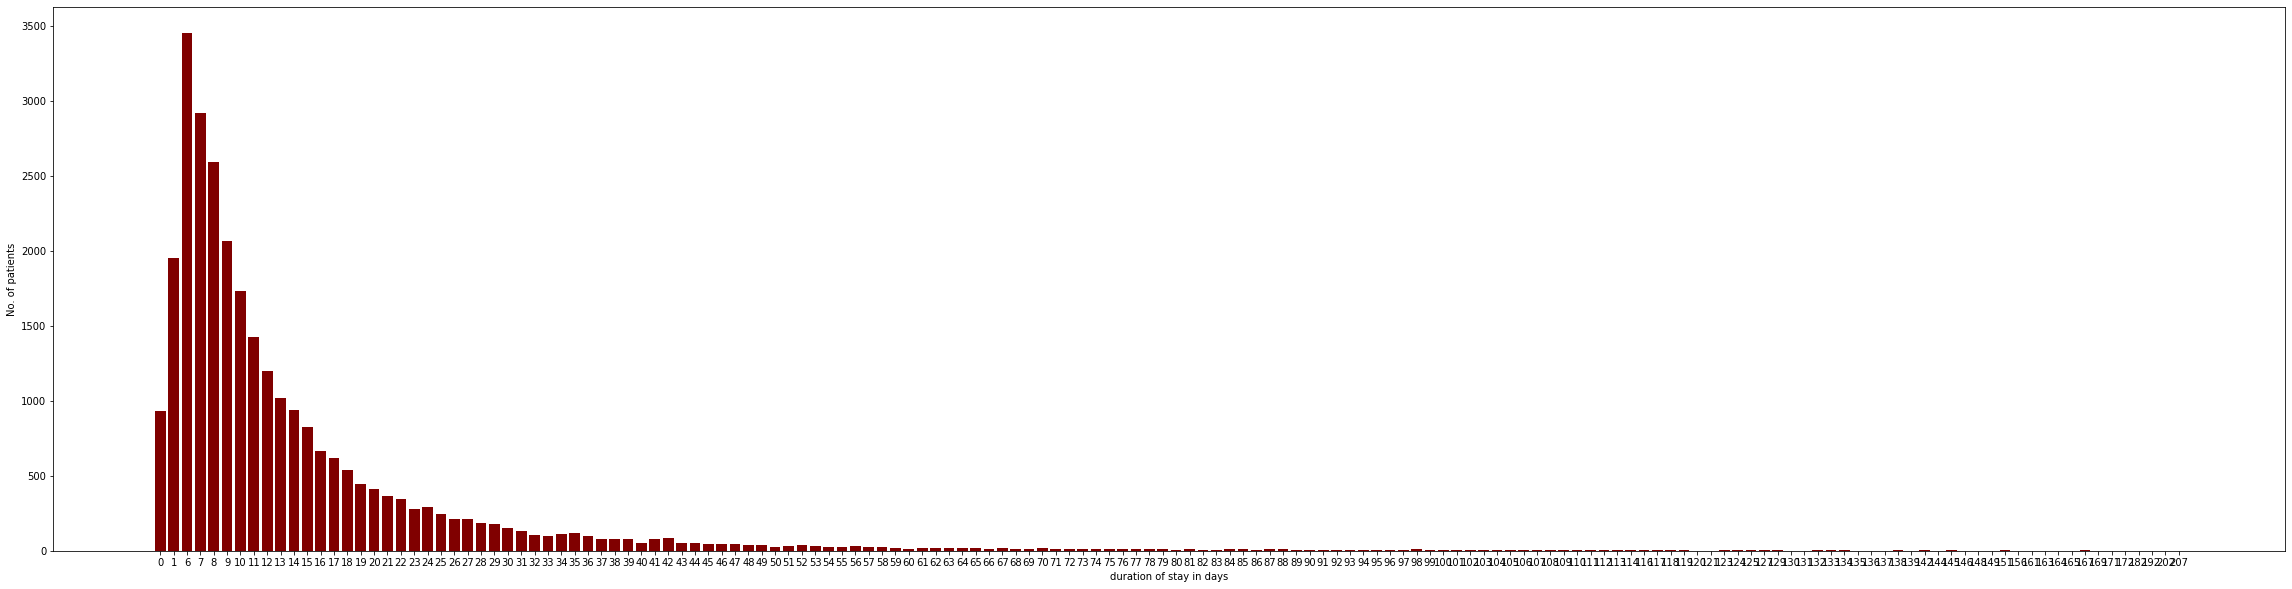

In [345]:

duration = list(average_duration.keys())
patient_number = list(average_duration.values())
duration

fig = plt.figure(figsize = (40, 10))
 
# creating the bar plot
plt.bar(duration, patient_number, color ='maroon')
 
plt.xlabel("duration of stay in days")
plt.ylabel("No. of patients")
# plt.title("Students enrolled in different courses")
plt.savefig('duration_of_stay.png')
plt.show()

In [249]:
# per subject idea get texts and chart times 
# plot No. of patients vs No.text so how many patients have how many texts 

#average admission duration 

In [346]:
notes_df = notes.sort_values(by=['SUBJECT_ID'])

In [347]:
notes_df[:10]

ROW_ID  SUBJECT_ID   HADM_ID   CHARTDATE            CHARTTIME  \
1671574  1678764           2  163353.0  2138-07-17  2138-07-17 22:51:00   
1671019  1678765           2  163353.0  2138-07-17  2138-07-17 23:08:00   
291220    272794           3       NaN  2101-10-06                  NaN   
765778    769224           3  145834.0  2101-10-26  2101-10-26 06:01:00   
291219    272793           3       NaN  2101-10-11                  NaN   
765844    769043           3  145834.0  2101-10-24  2101-10-24 08:05:00   
765847    769130           3  145834.0  2101-10-25  2101-10-25 06:32:00   
1297688  1260684           3  145834.0  2101-10-21  2101-10-21 06:58:00   
765931    769079           3  145834.0  2101-10-24  2101-10-24 16:06:00   
765959    768950           3  145834.0  2101-10-22  2101-10-22 16:27:00   

                   STORETIME       CATEGORY          DESCRIPTION     CGID  \
1671574  2138-07-17 23:12:00  Nursing/other               Report  16929.0   
1671019  2138-07-17 23:18:00  Nursing/other               Report  17774.0   
291220                   NaN            ECG               Report      NaN   
765778                   NaN      Radiology  CHEST (PORTABLE AP)      NaN   
291219                   NaN            ECG               Report      NaN   
765844                   NaN      Radiology  CHEST (PORTABLE AP)      NaN   
765847                   NaN      Radiology  CHEST (PORTABLE AP)      NaN   
1297688  2101-10-21 07:15:00  Nursing/other               Report  21570.0   
765931                   NaN      Radiology  CHEST (PORTABLE AP)      NaN   
765959                   NaN      Radiology  CHEST (PORTABLE AP)      NaN   

         ISERROR                                               TEXT  
1671574      NaN  Neonatology Attending Triage Note\n\nBaby [**N...  
1671019      NaN  Nursing Transfer note\n\n\nPt admitted to NICU...  
291220       NaN  Sinus rhythm\nInferior/lateral ST-T changes ar...  
765778       NaN  [**2101-10-26**] 6:01 AM\n CHEST (PORTABLE AP)...  
291219       NaN  Sinus rhythm\nA-V delay\nNonspecific inferior ...  
765844       NaN  [**2101-10-24**] 8:05 AM\n CHEST (PORTABLE AP)...  
765847       NaN  [**2101-10-25**] 6:32 AM\n CHEST (PORTABLE AP)...  
1297688      NaN  Micu Progress Nursing Note:\n\nPatient arrived...  
765931       NaN  [**2101-10-24**] 4:06 PM\n CHEST (PORTABLE AP)...  
765959       NaN  [**2101-10-22**] 4:27 PM\n CHEST (PORTABLE AP)...

In [349]:
patient_texts = []
for row in notes_df["SUBJECT_ID"]:
    patient_texts.append(row)

In [369]:
times = list(zip(notes_df["SUBJECT_ID"], notes_df["CHARTDATE"]))

In [371]:
subject_4 = []
for x in times:
    if x[0] == 4:
        subject_4.append(x[1])

In [373]:
subject_4.sort()

In [374]:
subject_4

['2191-03-15',
 '2191-03-15',
 '2191-03-15',
 '2191-03-16',
 '2191-03-16',
 '2191-03-16',
 '2191-03-16',
 '2191-03-17',
 '2191-03-18',
 '2191-03-19',
 '2191-03-21',
 '2191-03-21',
 '2191-03-22',
 '2191-03-23',
 '2191-04-11',
 '2191-04-11',
 '2191-04-12',
 '2191-04-12',
 '2191-04-13',
 '2191-04-13',
 '2191-04-15',
 '2191-04-17',
 '2191-05-16',
 '2191-05-16',
 '2191-05-16',
 '2191-05-18',
 '2191-05-18',
 '2191-05-18',
 '2191-05-19',
 '2191-05-20',
 '2191-05-20',
 '2191-05-20',
 '2191-05-21',
 '2191-05-22',
 '2191-05-23',
 '2191-05-26',
 '2191-05-28',
 '2191-05-31',
 '2191-06-02',
 '2191-06-15',
 '2191-06-23',
 '2192-02-29',
 '2192-03-07']

In [351]:
number_of_patient_texts = dict(Counter(patient_texts))

In [368]:
# number_of_patient_texts

In [355]:
number_of_texts = list(number_of_patient_texts.values())

In [357]:
final_count = dict(Counter(number_of_texts))

In [358]:
#key = number of texts per patient; value: how many patients in the whole data set had that many notes
final_count

{2: 2162,
 62: 148,
 43: 326,
 4: 1021,
 23: 721,
 9: 1336,
 35: 434,
 42: 315,
 24: 685,
 27: 608,
 34: 431,
 30: 481,
 20: 805,
 14: 1126,
 10: 1360,
 82: 87,
 32: 437,
 5: 1030,
 13: 1263,
 12: 1262,
 15: 1186,
 33: 397,
 89: 76,
 129: 42,
 39: 336,
 31: 485,
 40: 323,
 21: 817,
 3: 1352,
 11: 1308,
 68: 118,
 17: 971,
 51: 212,
 57: 169,
 16: 1104,
 48: 262,
 83: 80,
 75: 131,
 7: 1111,
 6: 1074,
 80: 103,
 300: 6,
 502: 1,
 567: 1,
 113: 53,
 123: 41,
 18: 933,
 59: 166,
 136: 39,
 36: 385,
 267: 8,
 1279: 1,
 90: 74,
 106: 54,
 386: 1,
 377: 2,
 22: 748,
 88: 67,
 29: 548,
 50: 204,
 359: 4,
 8: 1223,
 45: 252,
 308: 6,
 100: 62,
 46: 246,
 230: 9,
 552: 2,
 38: 318,
 124: 42,
 1: 167,
 26: 604,
 84: 94,
 111: 55,
 323: 3,
 81: 85,
 49: 245,
 53: 192,
 67: 134,
 74: 116,
 44: 292,
 94: 62,
 64: 143,
 65: 152,
 72: 121,
 112: 37,
 126: 42,
 52: 200,
 117: 53,
 108: 62,
 19: 906,
 25: 629,
 145: 27,
 78: 99,
 165: 20,
 41: 309,
 151: 30,
 170: 19,
 346: 4,
 154: 31,
 58: 146,
 125:

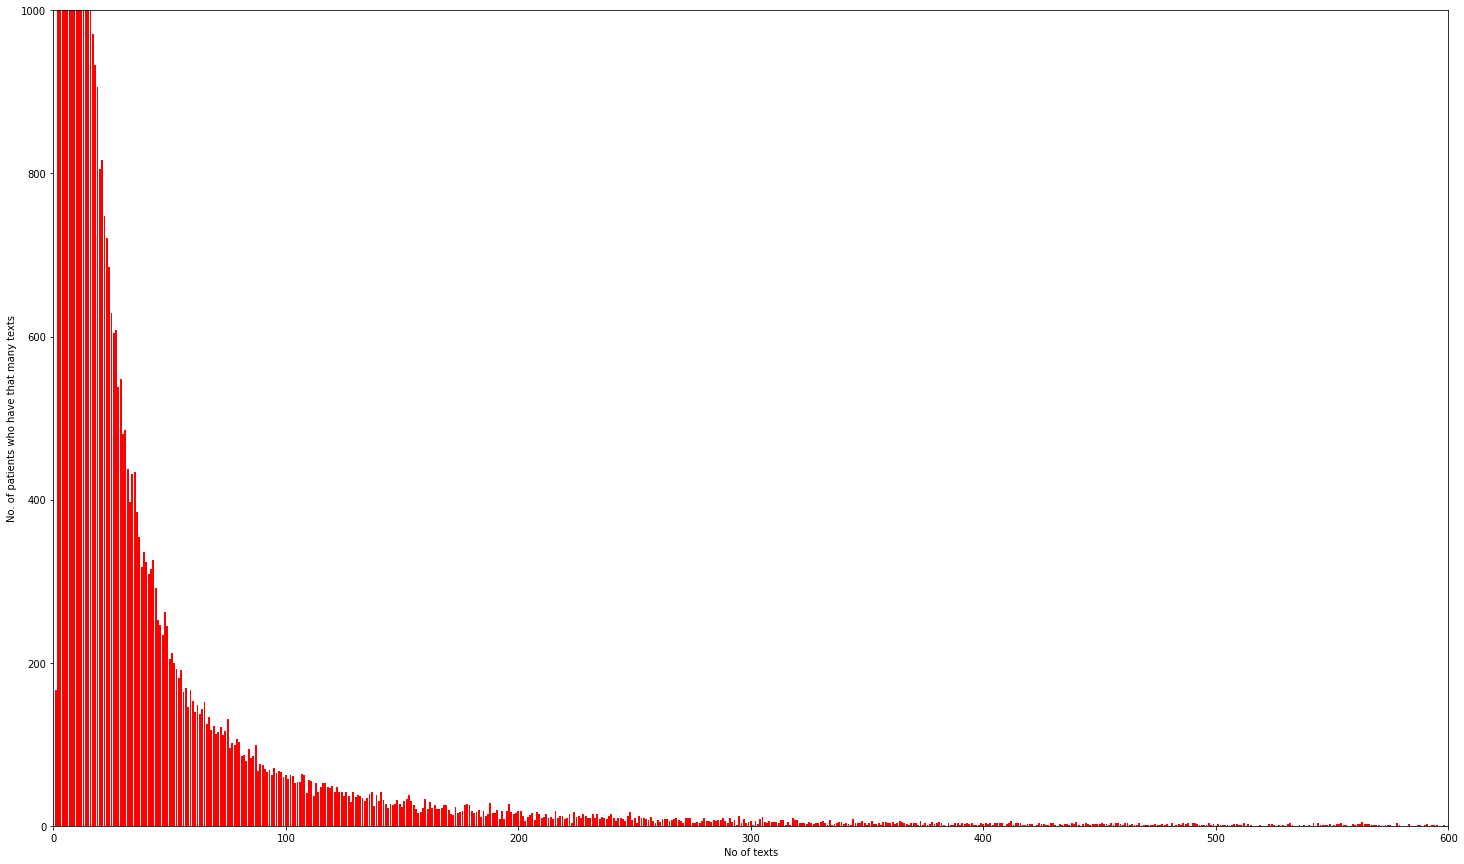

In [367]:
number_of_texts = list(final_count.keys())
number_of_patients = list(final_count.values())


fig = plt.figure(figsize = (25, 15))
 
# creating the bar plot
plt.bar(number_of_texts, number_of_patients, color ='red')
plt.xlim([0, 600])
plt.ylim([0, 1000])
plt.xlabel("No of texts")
plt.ylabel("No. of patients who have that many texts")
# plt.title("Students enrolled in different courses")
# plt.savefig('duration_of_stay.png')
plt.show()

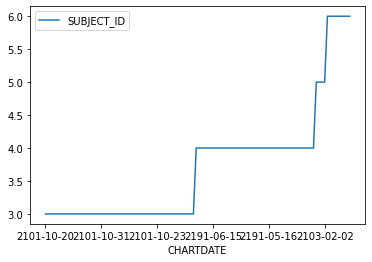

In [399]:
notes_df[10:120].plot(x='CHARTDATE', 
             y='SUBJECT_ID', 
             title='');

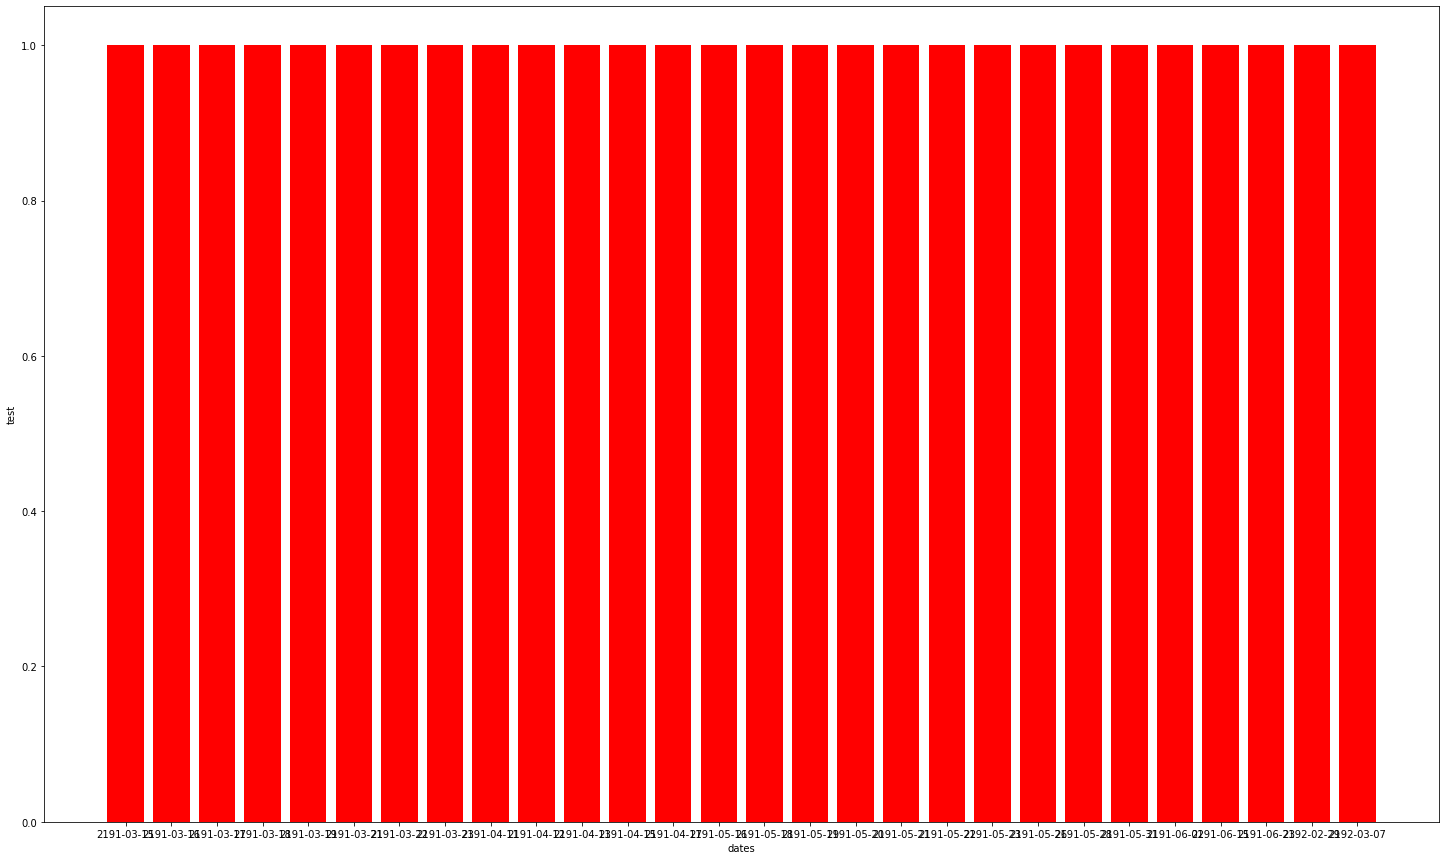

In [391]:
dates = subject_4
number_of_patients = a


fig = plt.figure(figsize = (25, 15))
 
# creating the bar plot
plt.bar(dates, number_of_patients, color ='red')
# plt.xlim([0, 600])
# plt.ylim([0, 1000])
plt.xlabel("dates")
plt.ylabel("test")
# plt.title("Students enrolled in different courses")
# plt.savefig('duration_of_stay.png')
plt.show()

In [379]:
len(subject_4)

43